In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Bebchik\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [5]:
features = pd.read_csv('orange_small_churn_data.txt')
labels = pd.read_csv('orange_small_churn_labels.txt', names=['Label'])
data = pd.concat((features, labels), axis=1)

2\. Рассчитайте доли классов `отток` и `не отток`.

In [6]:
print ('Доля неоттока %.3f' % (labels[labels.Label==-1].shape[0]/float(labels.shape[0])))
print ('Доля оттока %.3f' % (labels[labels.Label==1].shape[0]/float(labels.shape[0])))

Доля неоттока 0.926
Доля оттока 0.074


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

_В случае, если целевая функция представлена бинарной переменной, имеет смысл сравнить средние значения выборки по каждому значению и ориентироваться на них. Неформальный подход заключается в визуальном анализе гистограмм._

In [7]:
numeric_data_columns = data.columns[:190]
categorical_data_columns = data.columns[190:]

In [11]:
delta_mean = []
for c in numeric_data_columns:
    d0 = data[c][data.Label == -1].dropna()
    d1 = data[c][data.Label == 1].dropna()
    if (d0.shape[0] != 0) & (d1.shape[0] != 0):
        ds0 = preprocessing.MinMaxScaler().fit_transform(d0.values.reshape((d0.values.size, 1)))
        ds1 = preprocessing.MinMaxScaler().fit_transform(d1.values.reshape((d1.values.size, 1)))
        delta_mean.append([c, abs(ds0.mean()-ds1.mean()), ds0.mean(), ds1.mean(), ds0.shape[0], ds1.shape[0]])

delta_mean.sort(key = lambda x:abs(x[1]), reverse=True)

df_delta = pd.DataFrame(delta_mean, columns = ['Feature', 'StdMeanDelta', 'StdMean0', 'StdMean1', 'Count0', 'Count1'])
df_delta.sort_values(by='StdMeanDelta', ascending=False).head(20)

C:\Users\Bebchik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Feature,StdMeanDelta,StdMean0,StdMean1,Count0,Count1
0,Var64,0.336274,0.121443,0.457717,180,10
1,Var168,0.309460,0.263554,0.573014,535,35
2,Var41,0.236777,0.037509,0.274286,535,35
3,Var190,0.236247,0.099687,0.335934,249,17
4,Var101,0.231353,0.011071,0.242424,667,33
5,Var87,0.224099,0.190187,0.414286,535,35
6,Var129,0.203698,0.016540,0.220238,535,35
7,Var16,0.199446,0.275103,0.474549,1109,56
8,Var115,0.193872,0.038560,0.232432,625,37
9,Var178,0.189041,0.049642,0.238683,497,27


_Видно, что для части признаков нормированное среднее существенно отличается для оттока и неоттока._

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

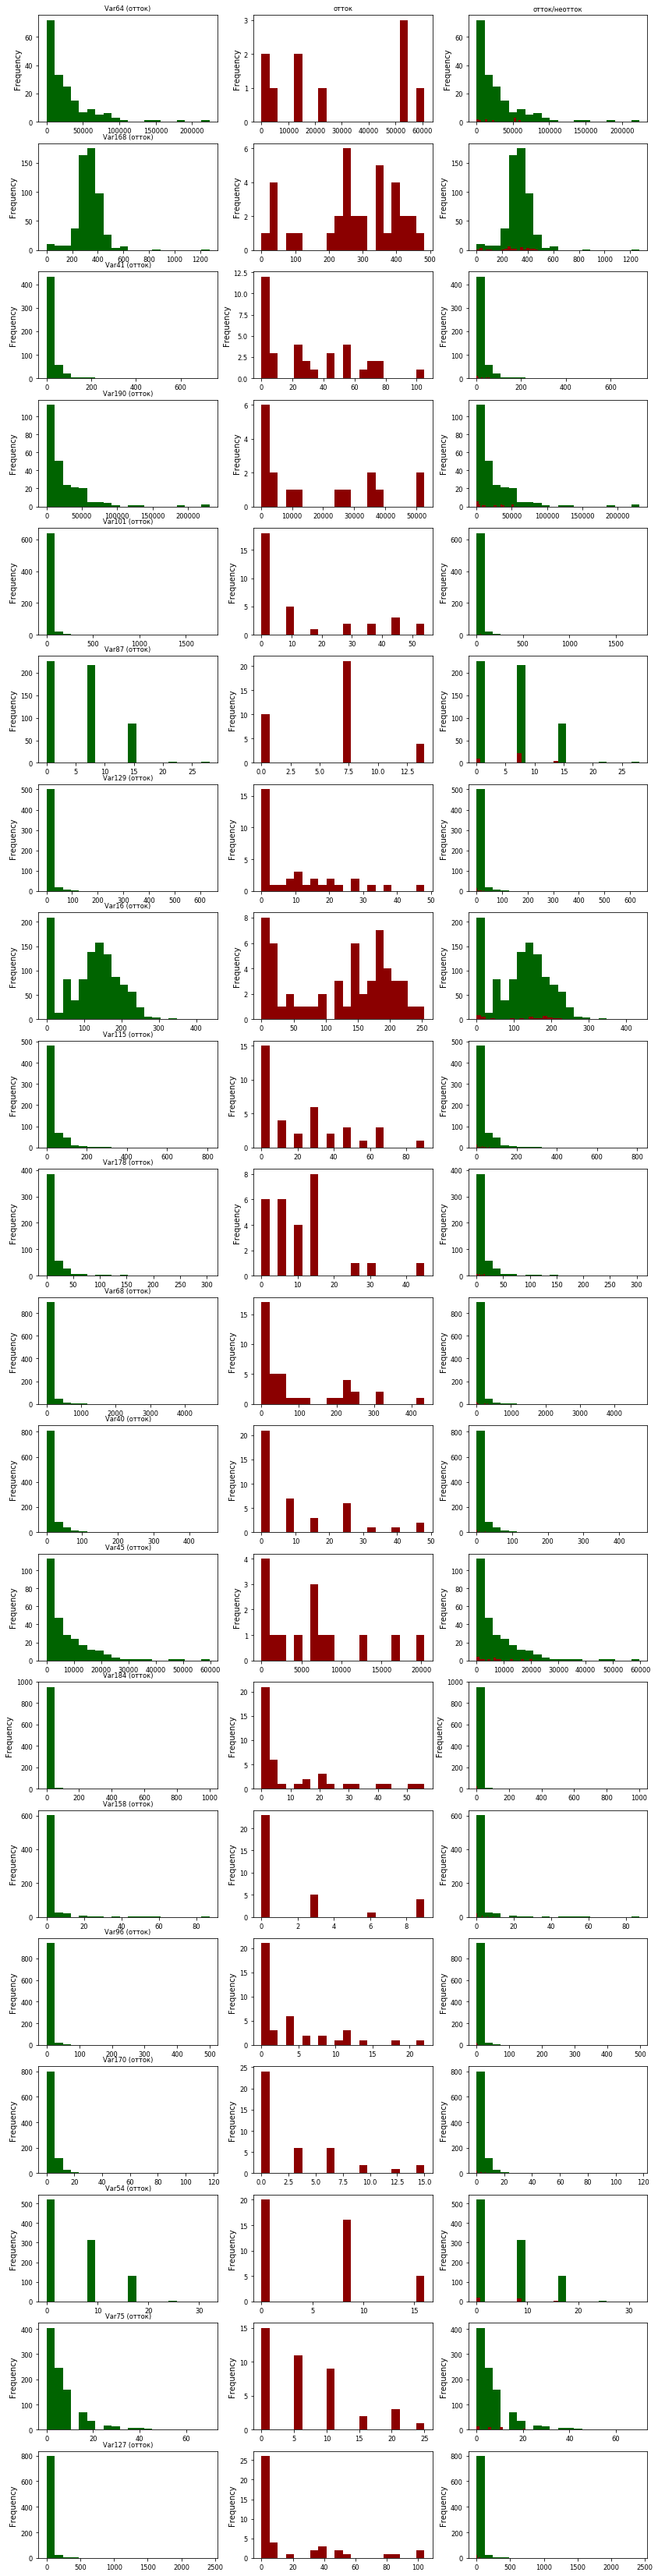

In [13]:
top20 = np.array(delta_mean[:20])[:,0]

fig, axs = plt.subplots(nrows = len(top20), ncols = 3, figsize=(14,60))

axs[0,0].set_title('неотток', fontsize='small')
axs[0,1].set_title('отток', fontsize='small')
axs[0,2].set_title('отток/неотток', fontsize='small')
    
for i, c in enumerate(top20):
    axs[i,0].set_title(c+' (отток)', fontsize='small')
    data[c][data.Label==-1].plot(kind='hist', color='darkgreen', ax=axs[i,0], fontsize='small', bins=20)
    data[c][data.Label==1].plot(kind='hist', color='darkred', ax=axs[i,1], fontsize='small', bins=20)
    data[c][data.Label==-1].plot(kind='hist', color='darkgreen', ax=axs[i,2], fontsize='small', bins=20)
    data[c][data.Label==1].plot(kind='hist', color='darkred', ax=axs[i,2], fontsize='small', bins=20)


C:\Users\Bebchik\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


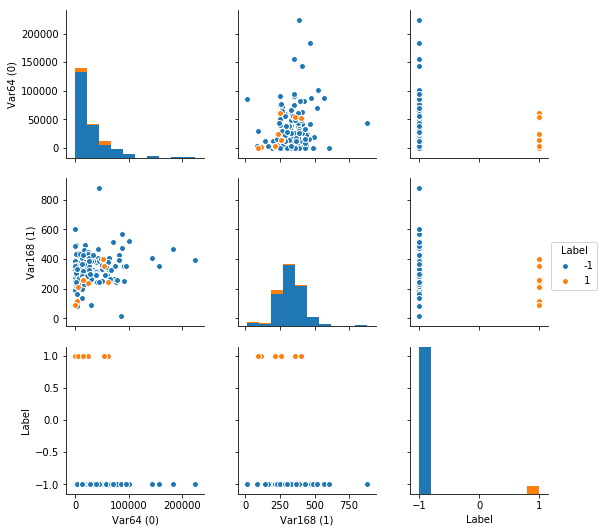

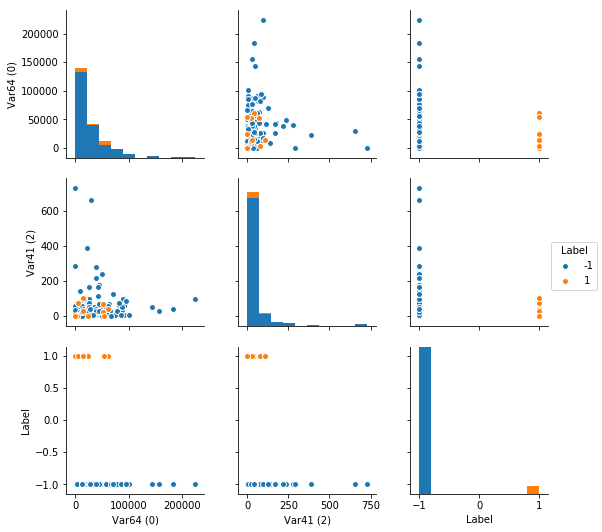

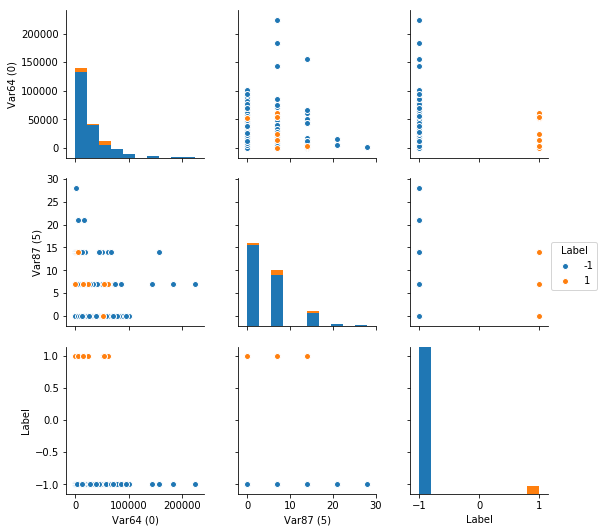

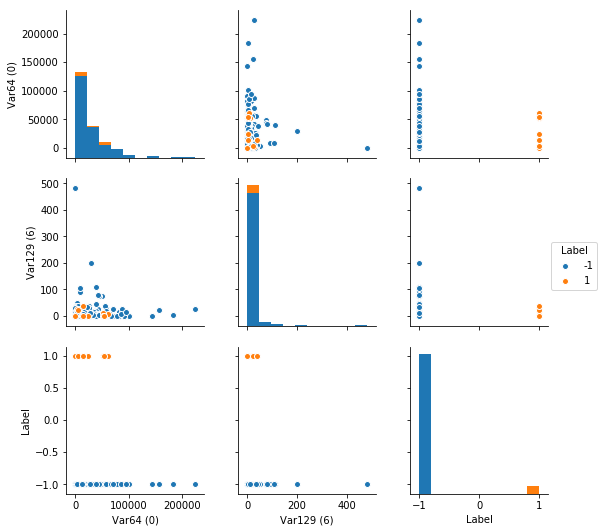

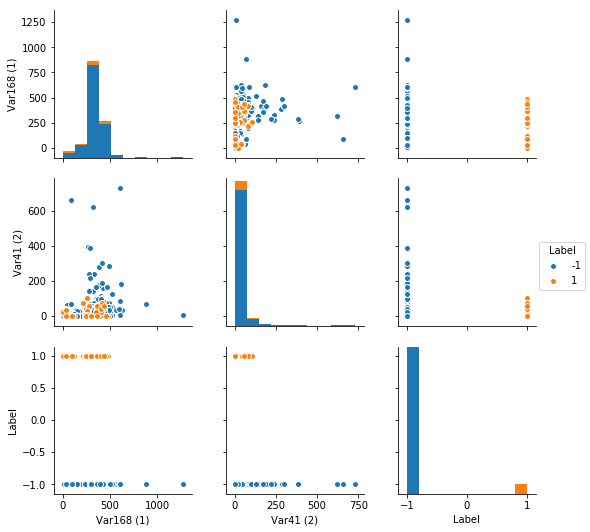

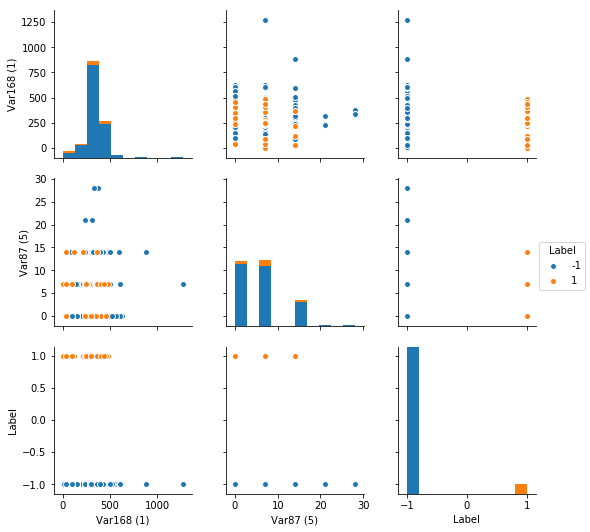

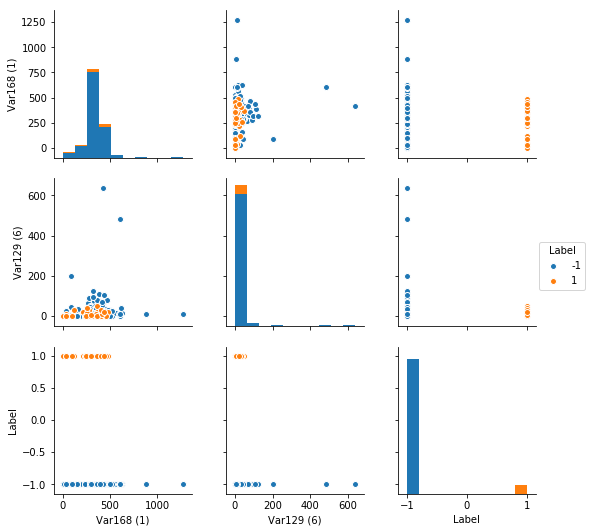

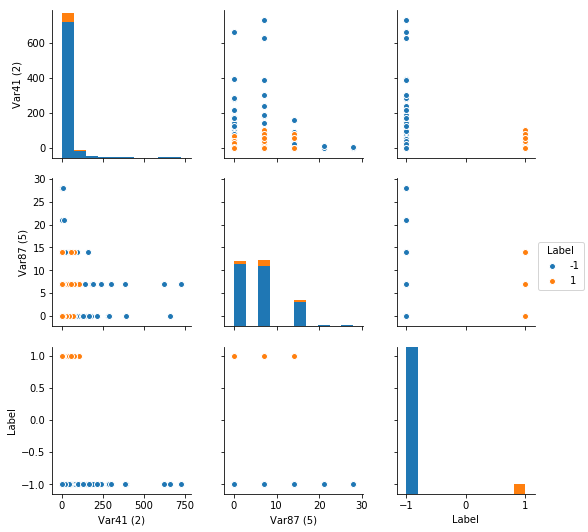

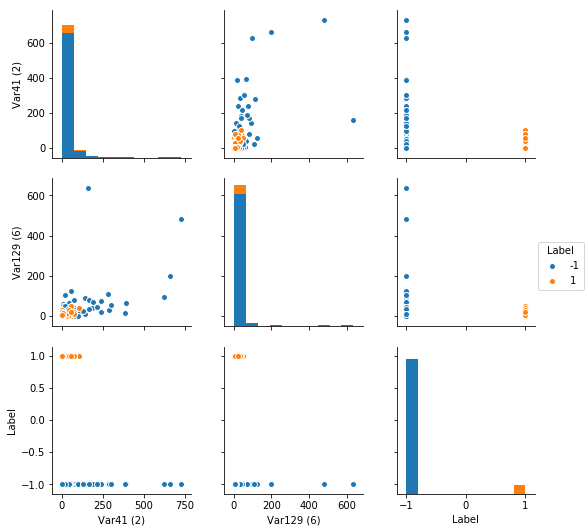

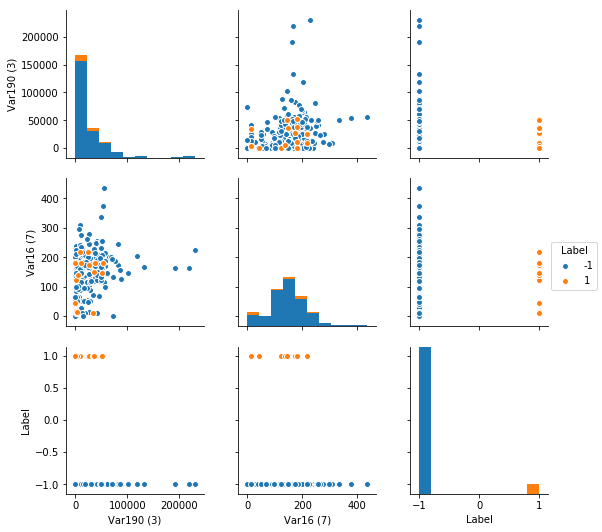

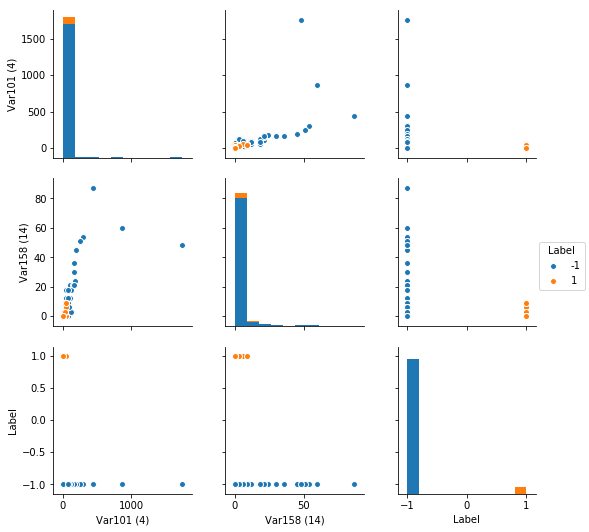

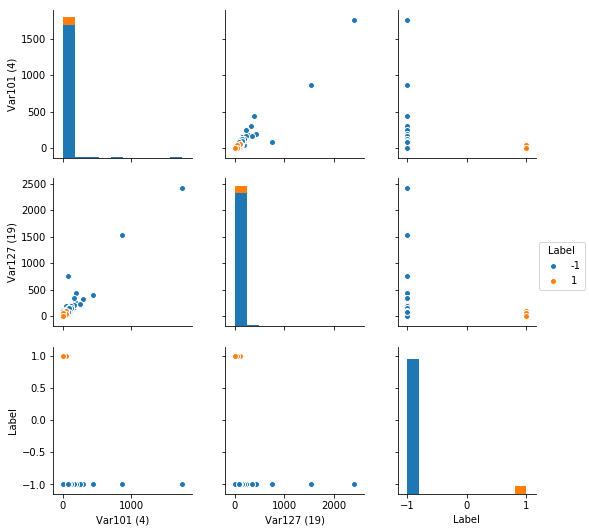

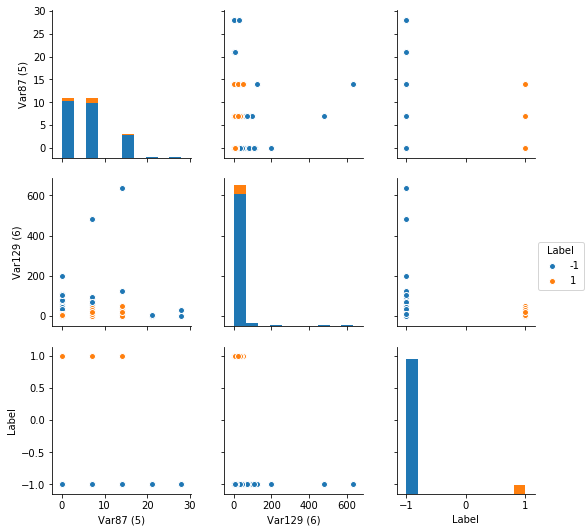

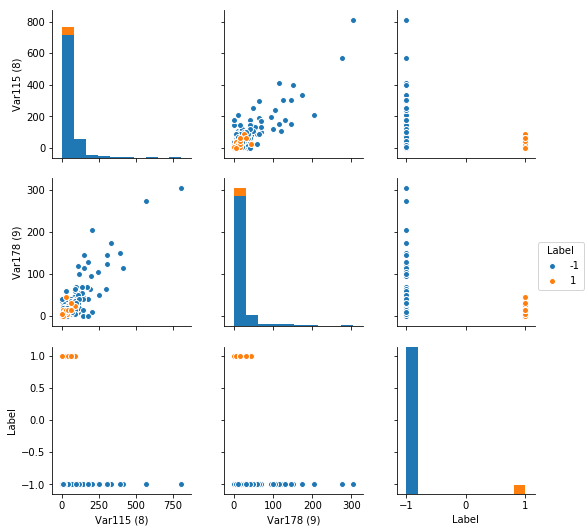

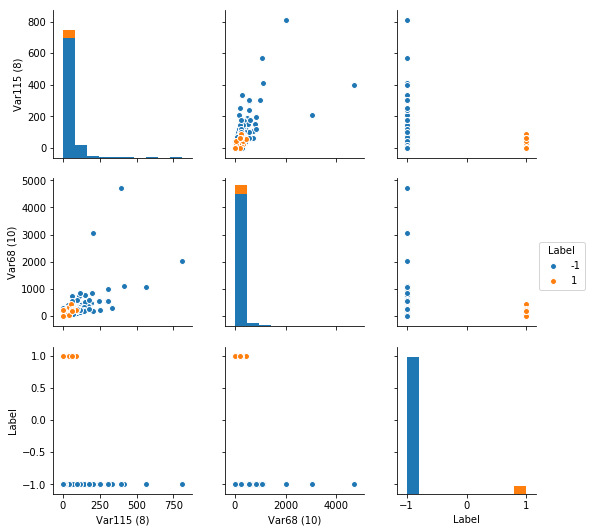

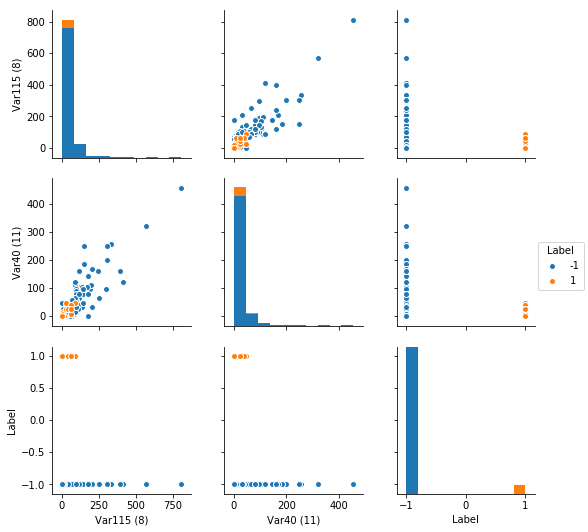

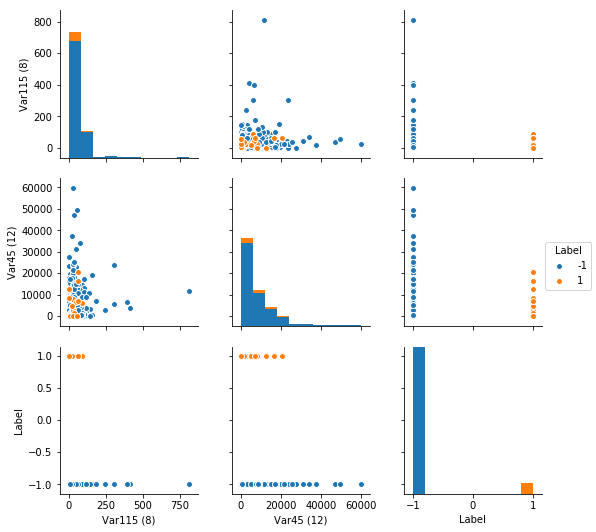

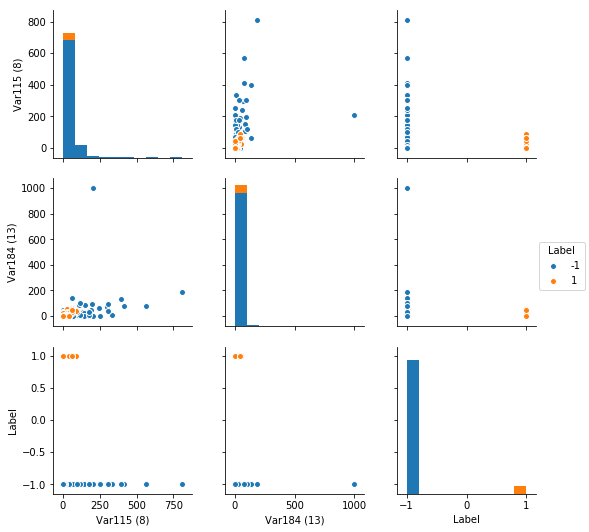

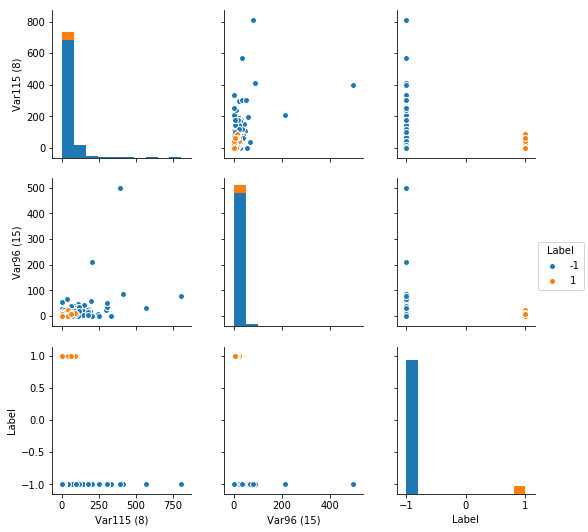

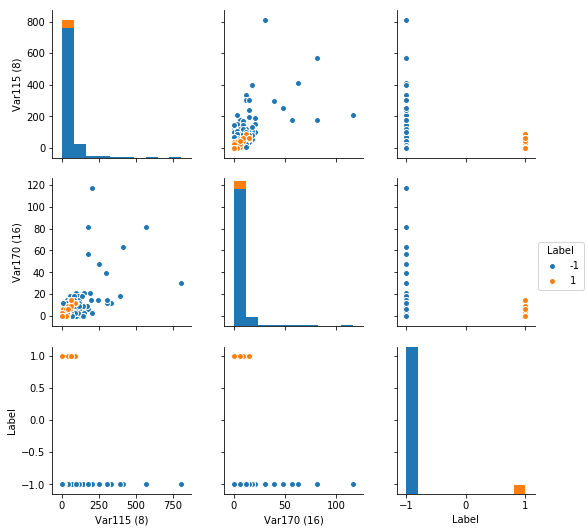

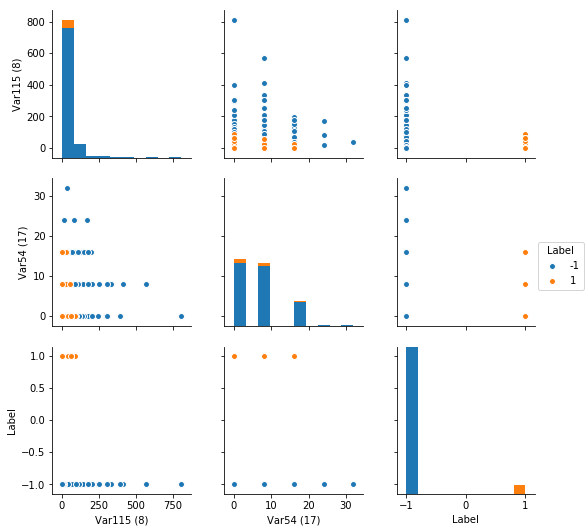

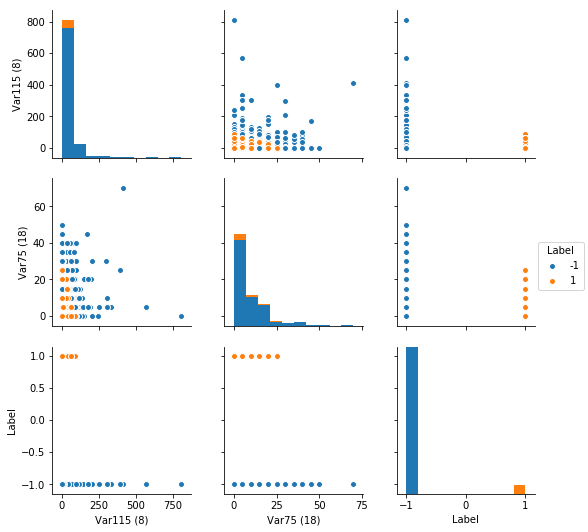

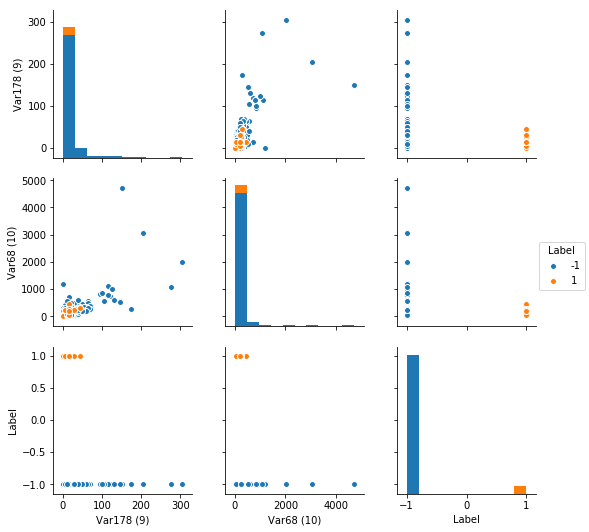

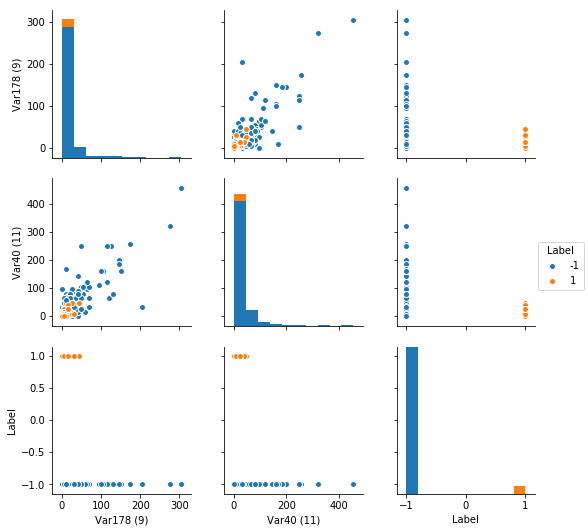

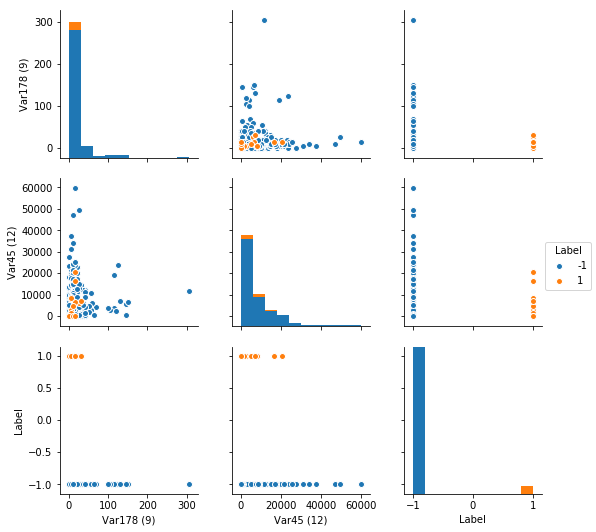

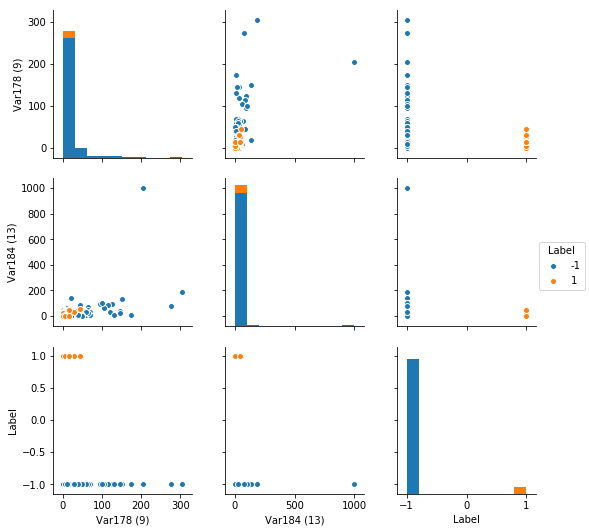

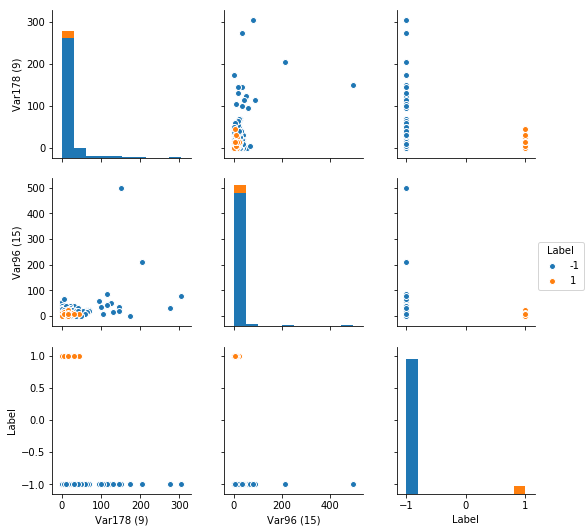

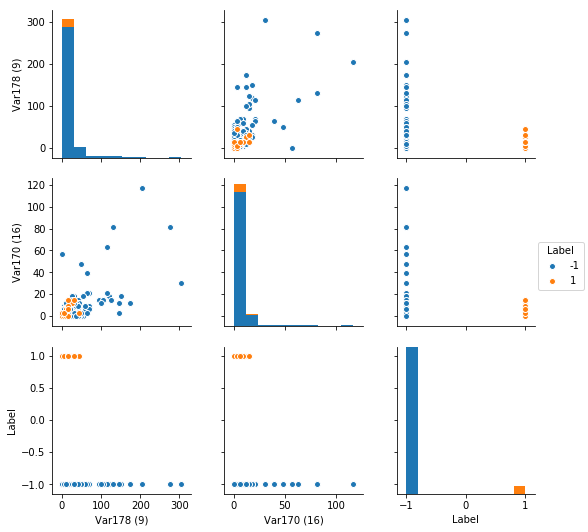

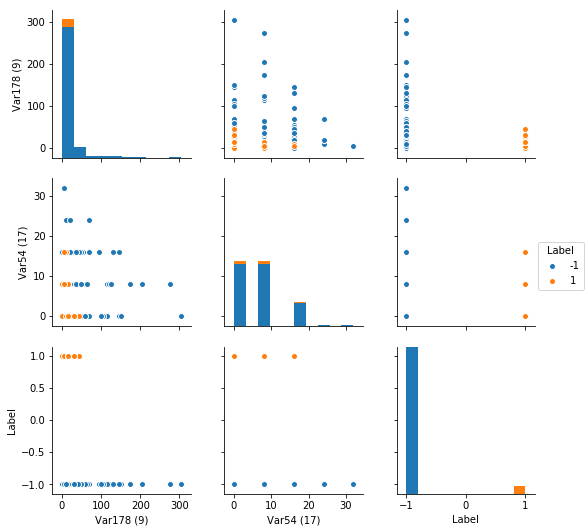

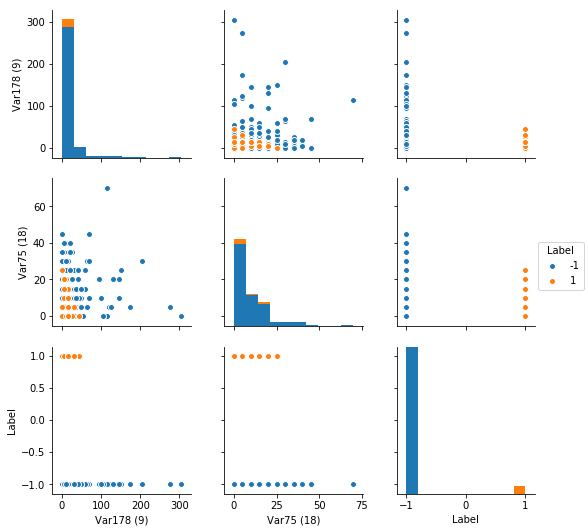

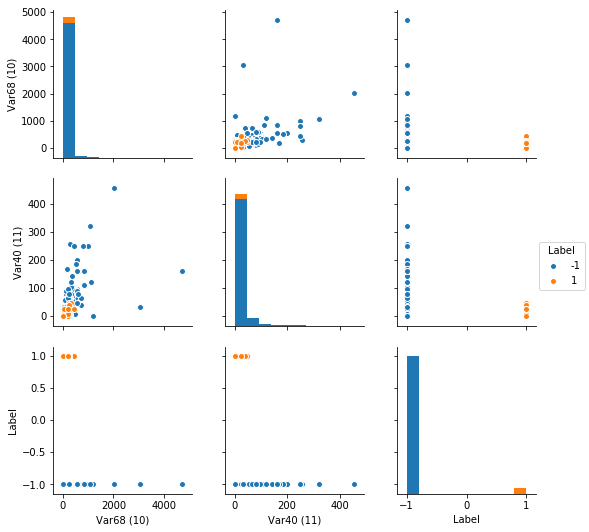

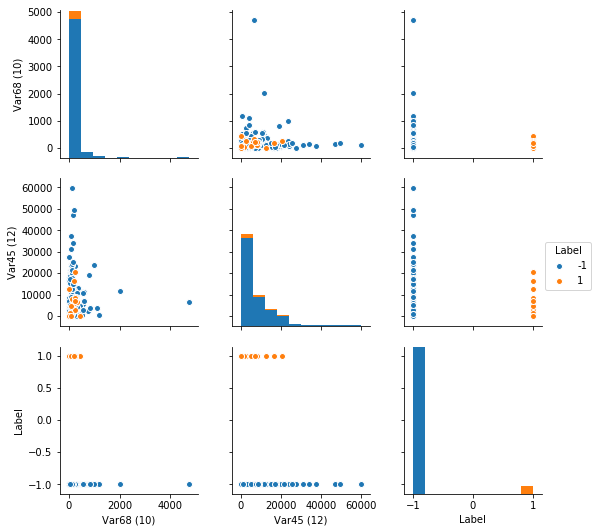

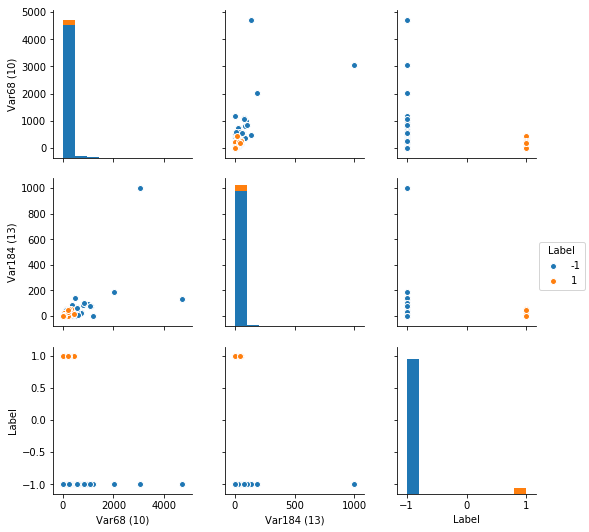

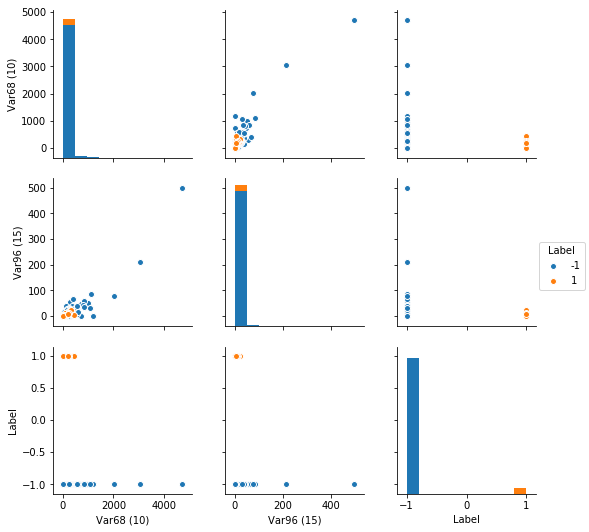

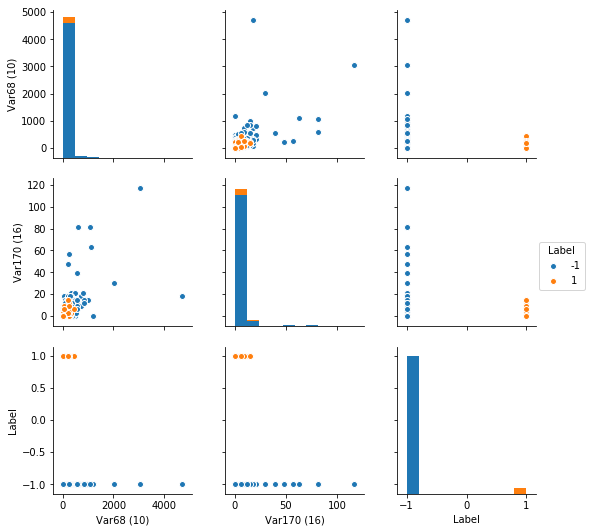

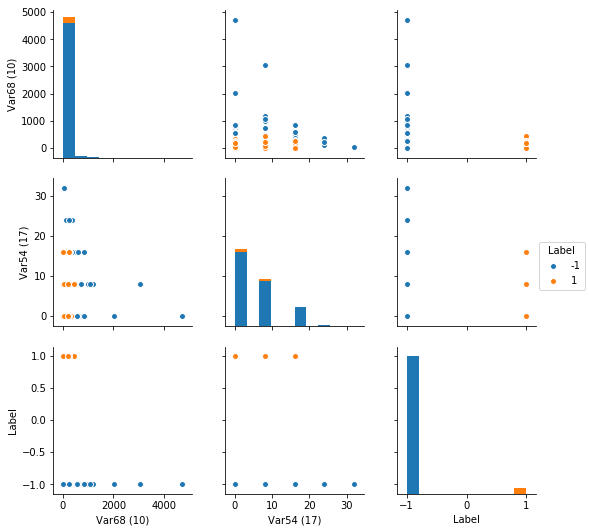

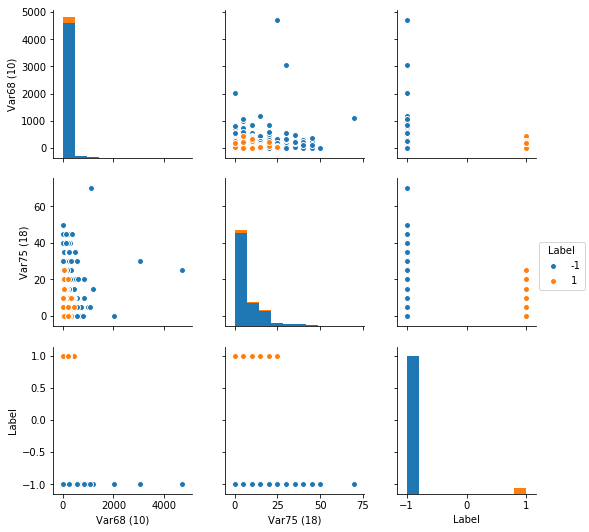

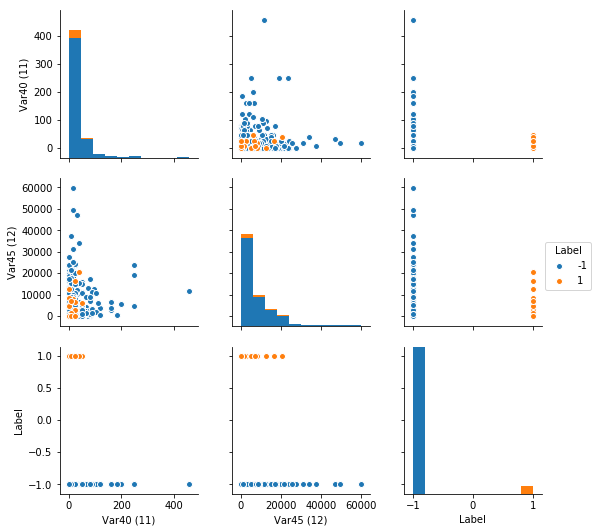

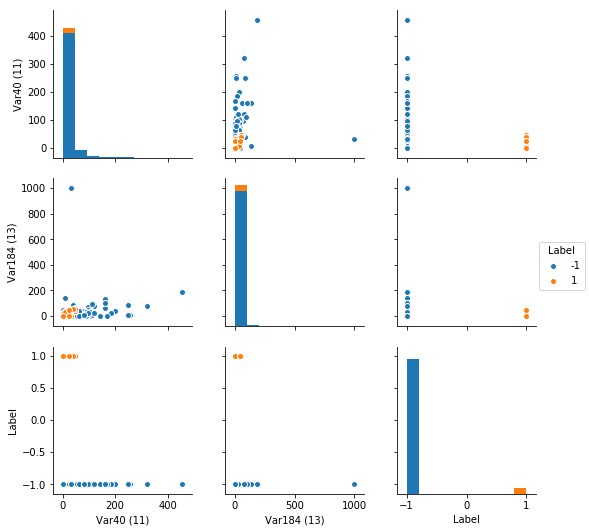

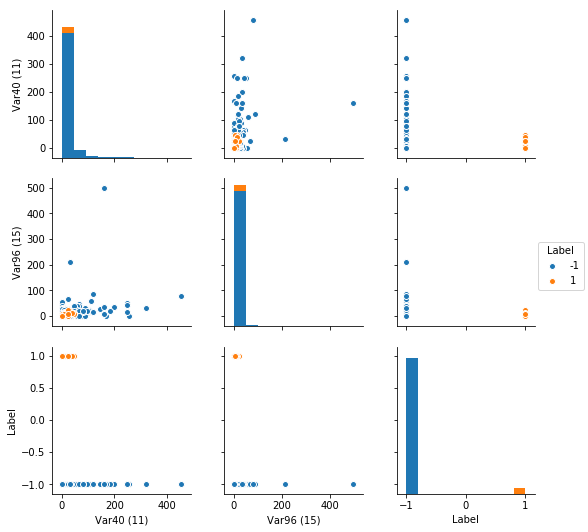

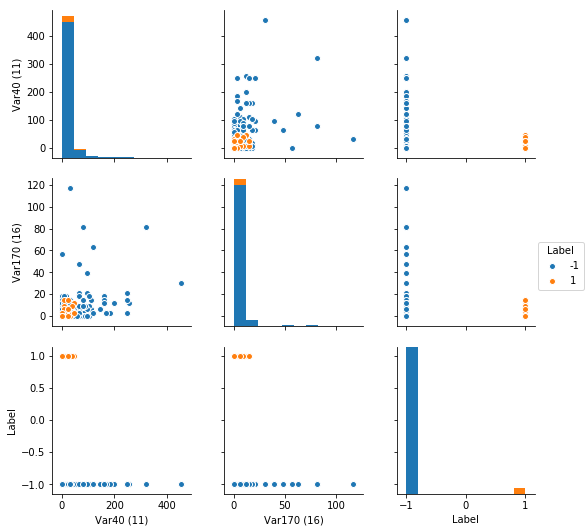

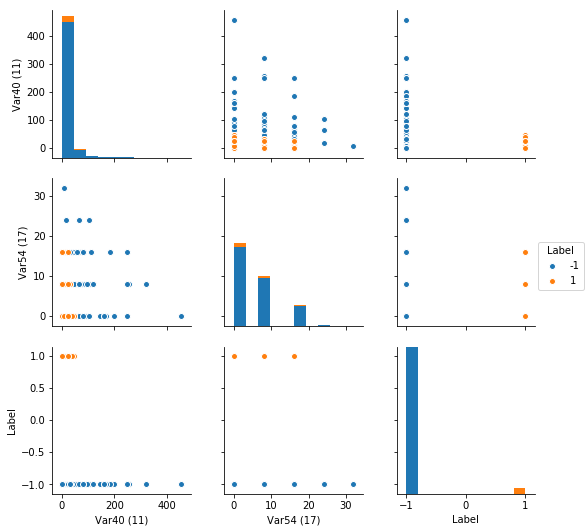

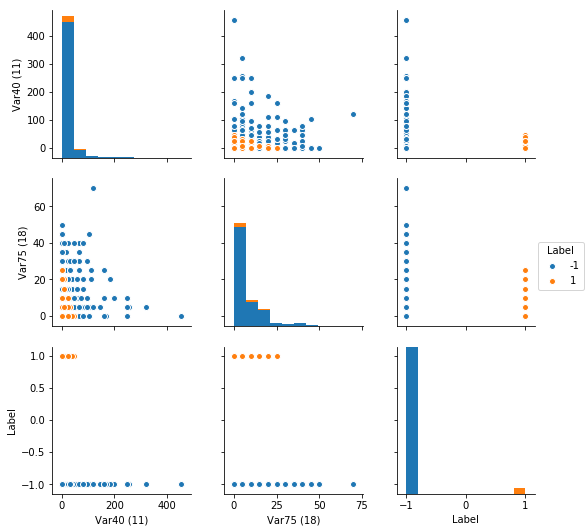

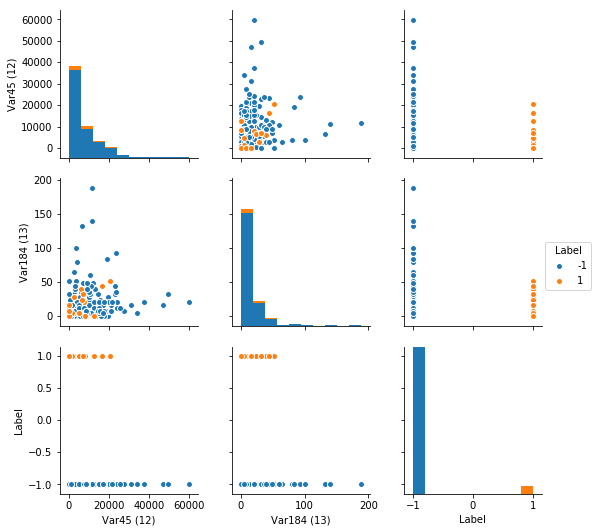

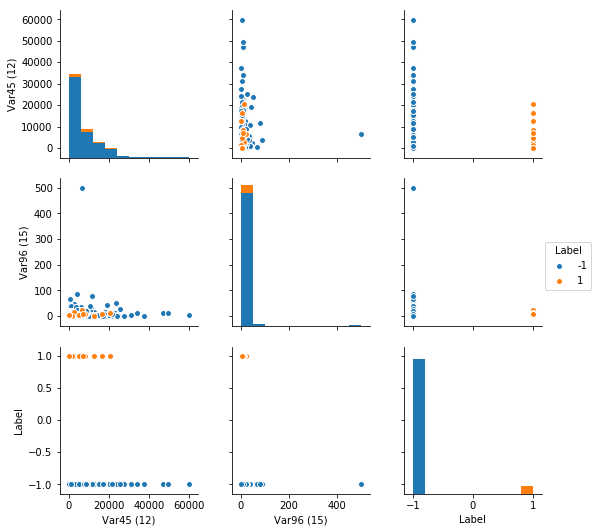

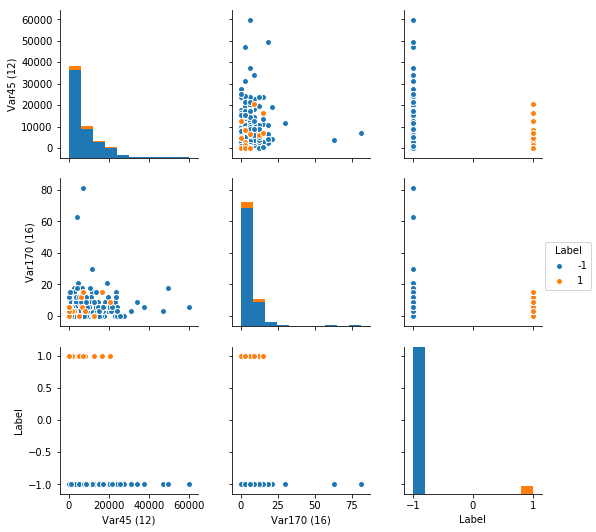

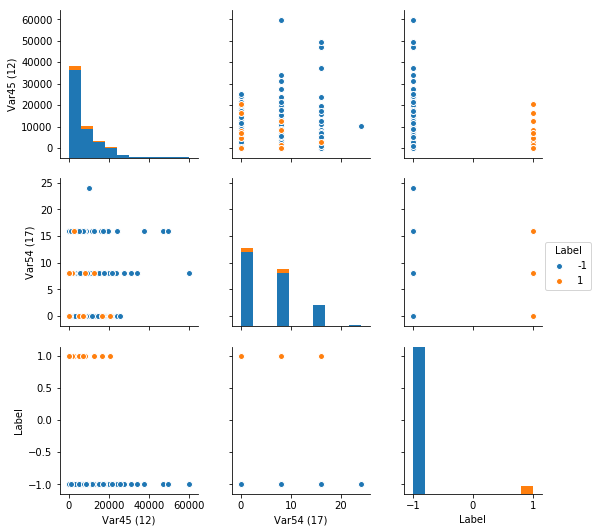

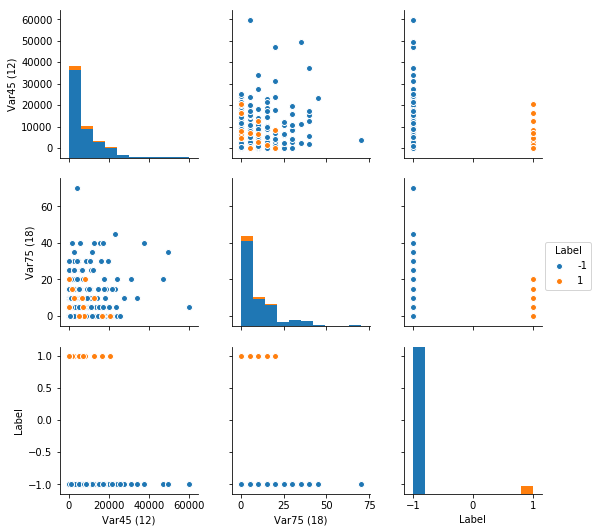

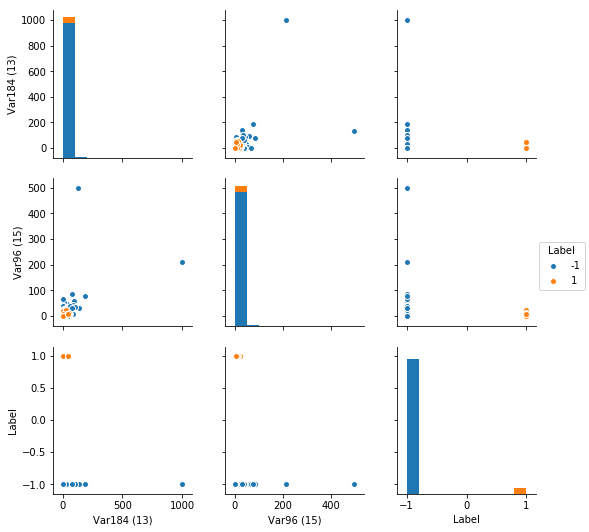

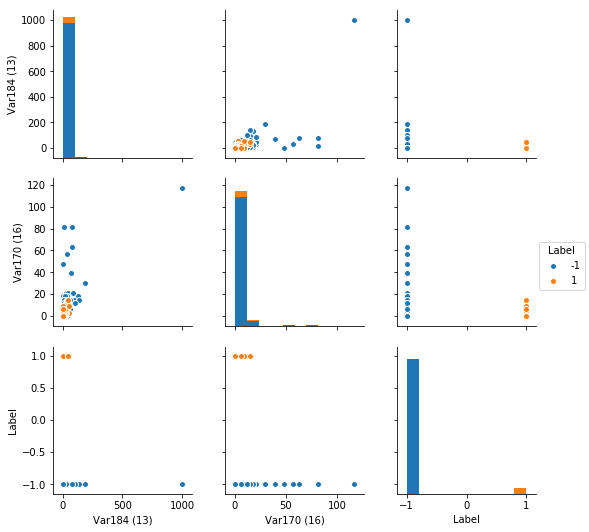

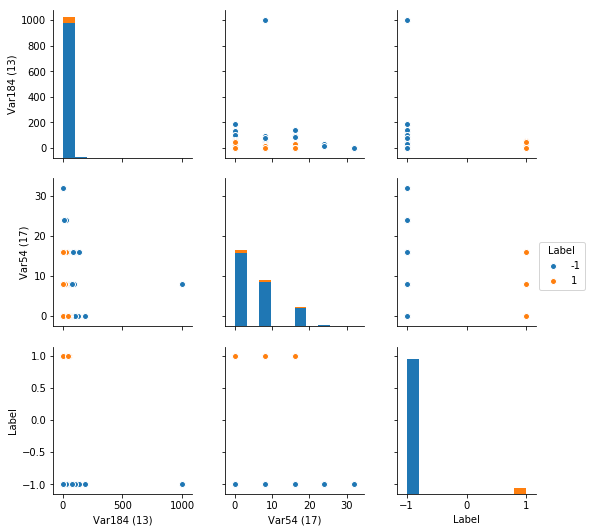

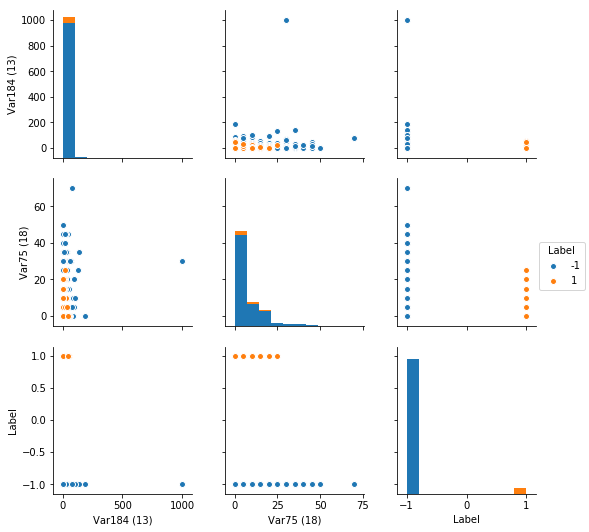

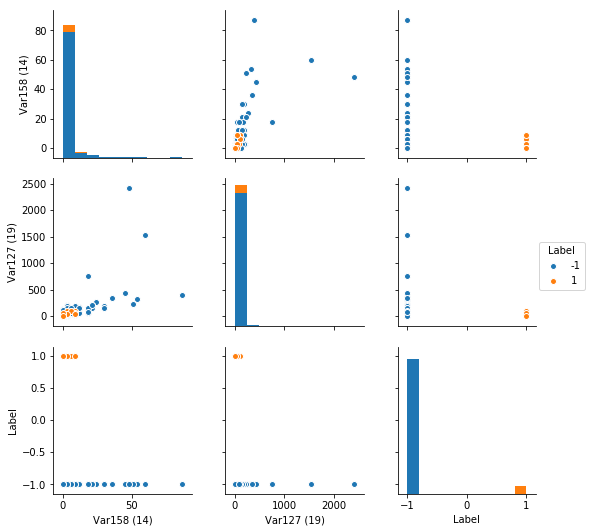

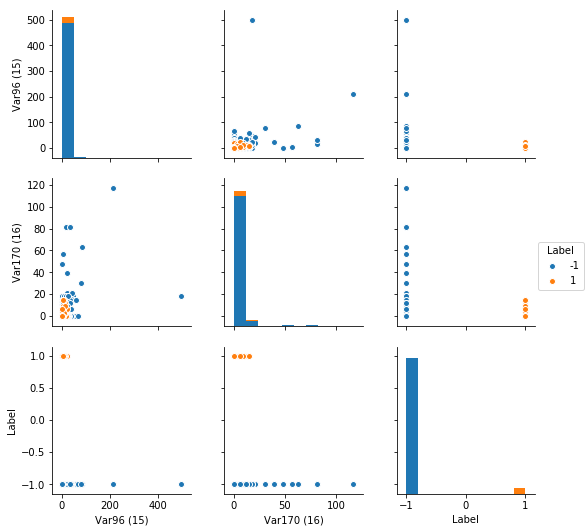

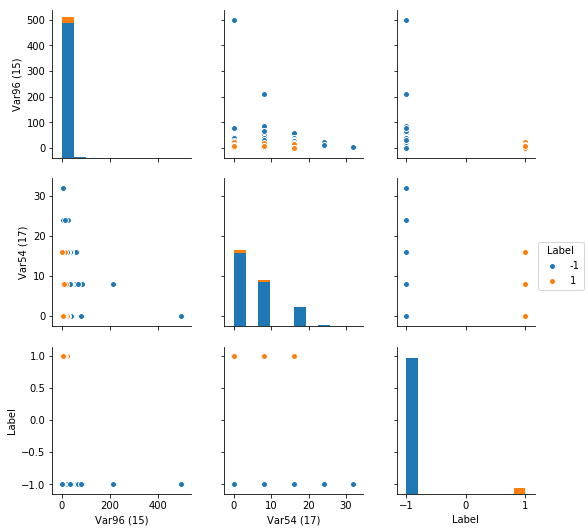

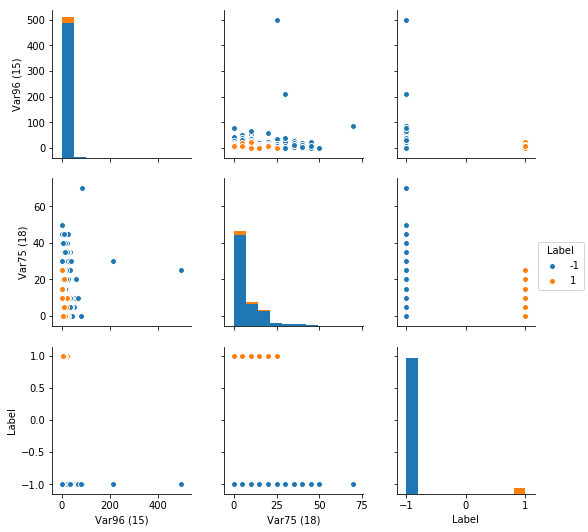

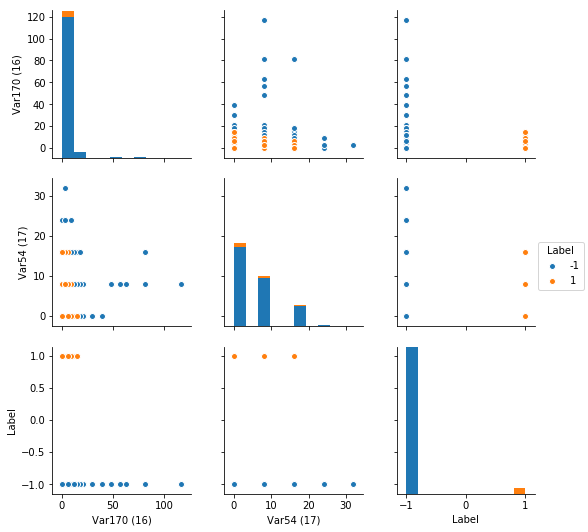

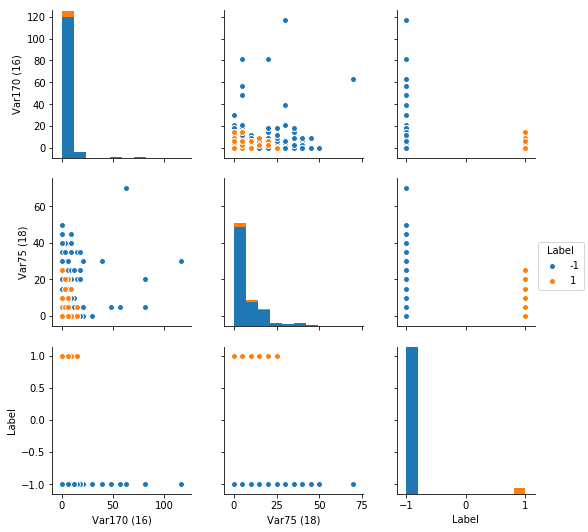

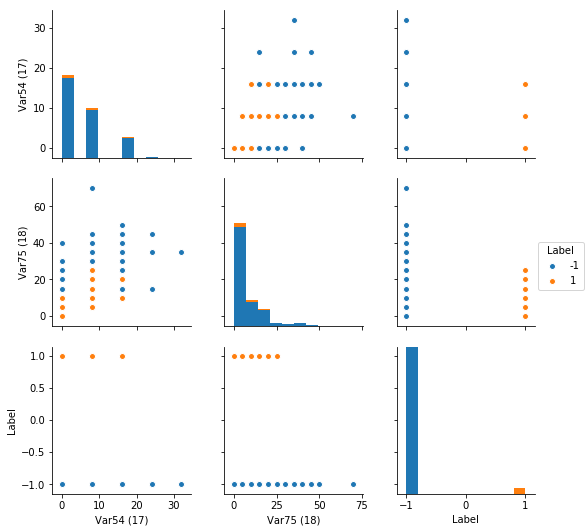

In [10]:
for i, c in enumerate(top20[:]):
    for j, c2 in enumerate(top20[:]):
        if (i < j):
            dpair = data[[c,c2,'Label']].dropna()
            dpair.columns = [c+' (%i)'%i, c2+' (%i)'%j,'Label']
            if dpair.shape[0]!=0:
                sns.pairplot(dpair, hue='Label', diag_kind = 'hist')

_По графикам явно видны области, характерные для оттока. Скорее даже можно сказать, что отток локализован в некоторых областях, а для окружающих областей отток нехарактерен._

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

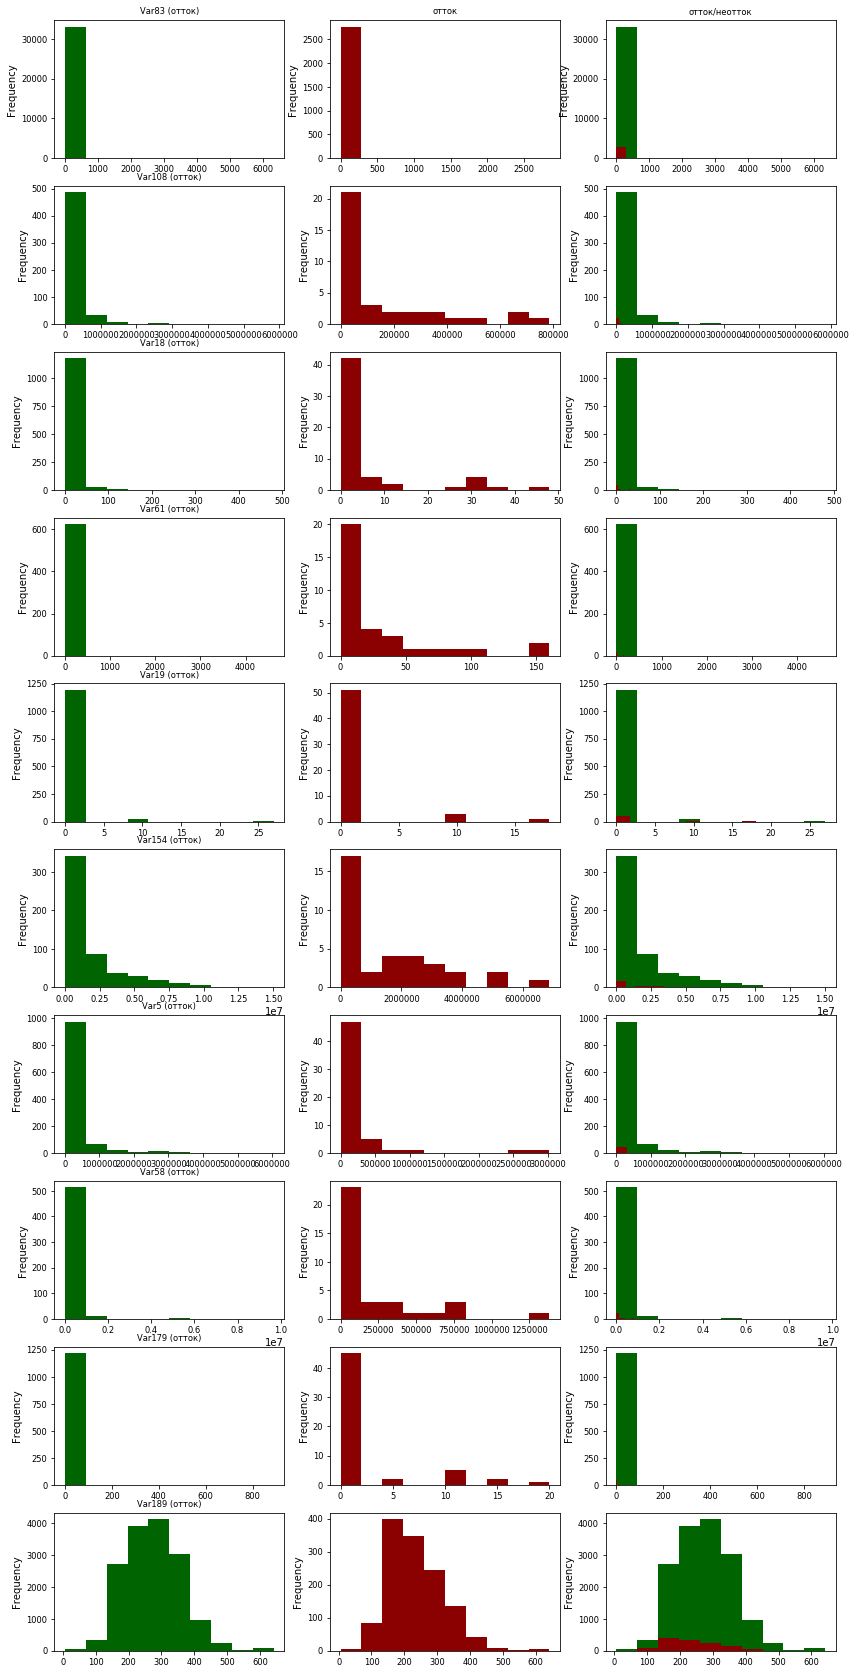

In [9]:
np.random.seed(0)
#для случайных признаков не будем использовать те, которые попали в топ20, иначе сложно интерпретировать резултат
rnd10 = np.random.choice(list(set(np.array(delta_mean)[:,0])-set(top20)),10)

fig, axs = plt.subplots(nrows = len(rnd10), ncols = 3, figsize=(14,30))

axs[0,0].set_title('неотток', fontsize='small')
axs[0,1].set_title('отток', fontsize='small')
axs[0,2].set_title('отток/неотток', fontsize='small')
    
for i, c in enumerate(rnd10):
    axs[i,0].set_title(c+' (отток)', fontsize='small')
    data[c][data.Label==-1].plot(kind='hist', color='darkgreen', ax=axs[i,0], fontsize='small')
    data[c][data.Label==1].plot(kind='hist', color='darkred', ax=axs[i,1], fontsize='small')
    data[c][data.Label==-1].plot(kind='hist', color='darkgreen', ax=axs[i,2], fontsize='small')
    data[c][data.Label==1].plot(kind='hist', color='darkred', ax=axs[i,2], fontsize='small')    

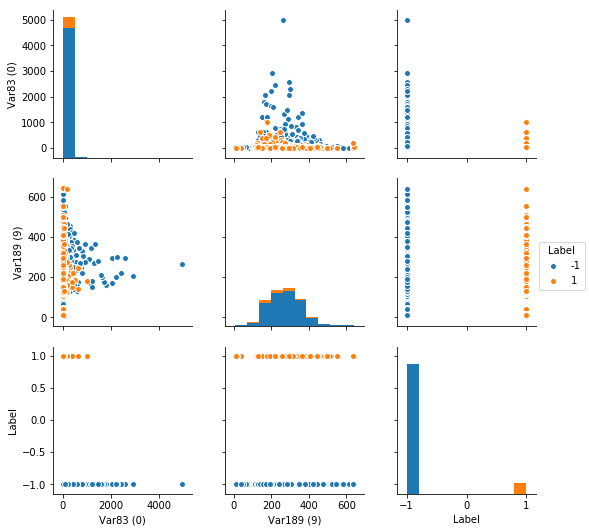

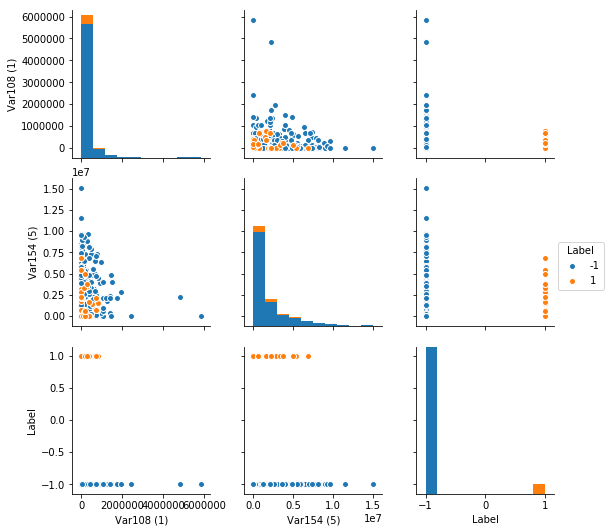

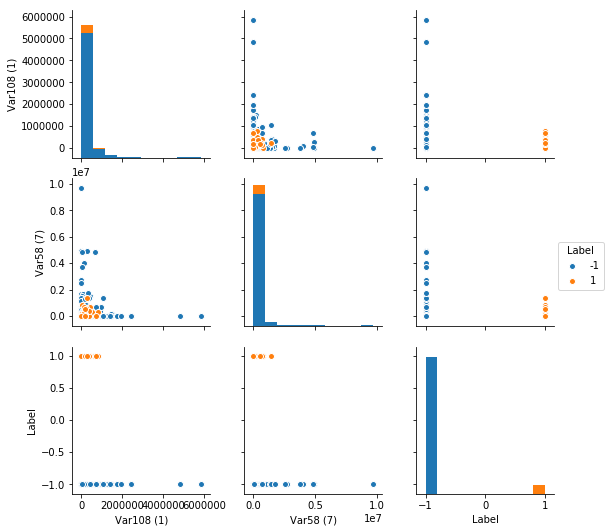

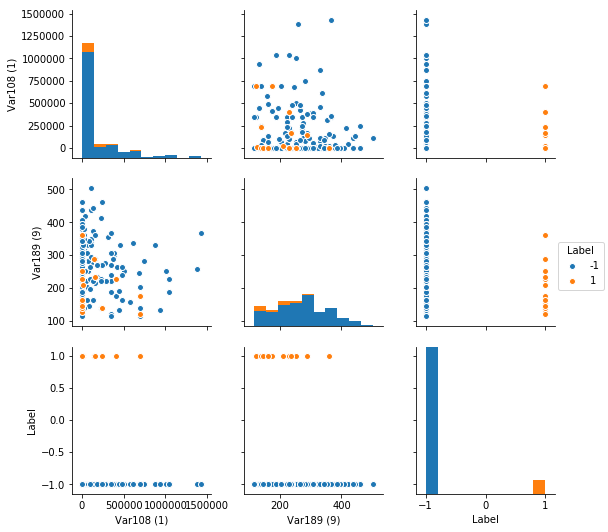

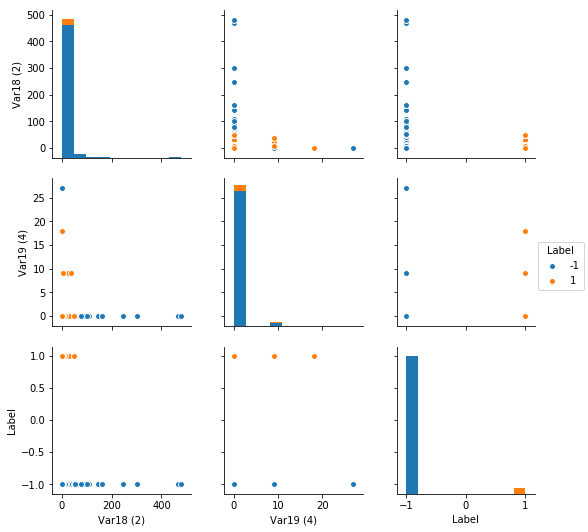

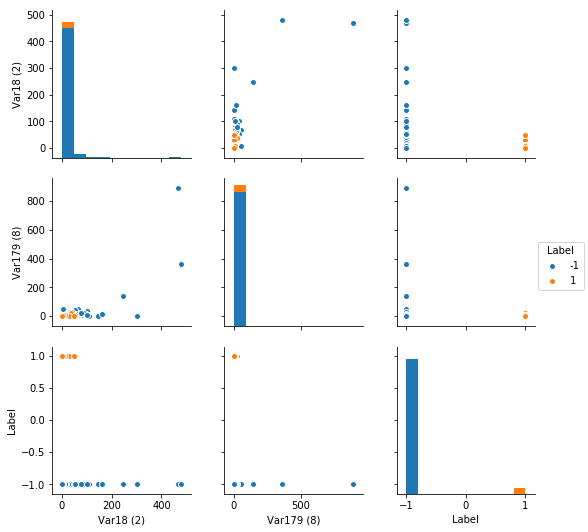

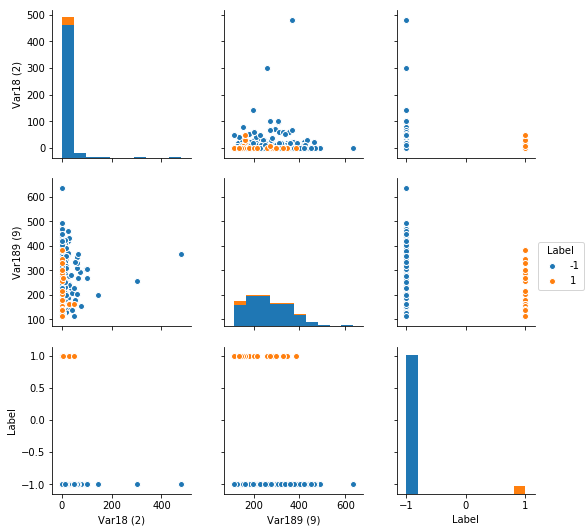

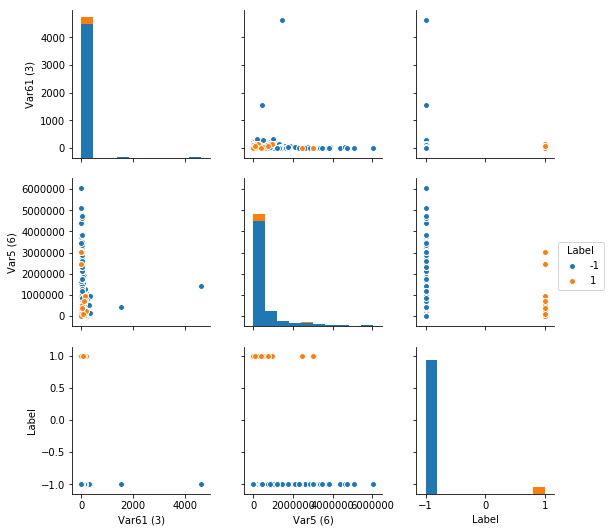

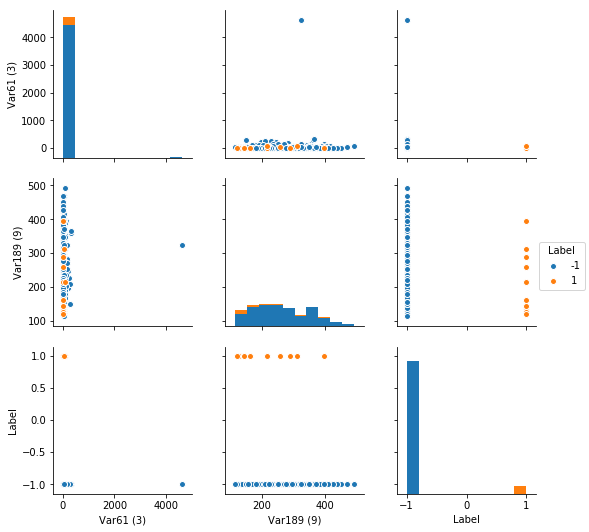

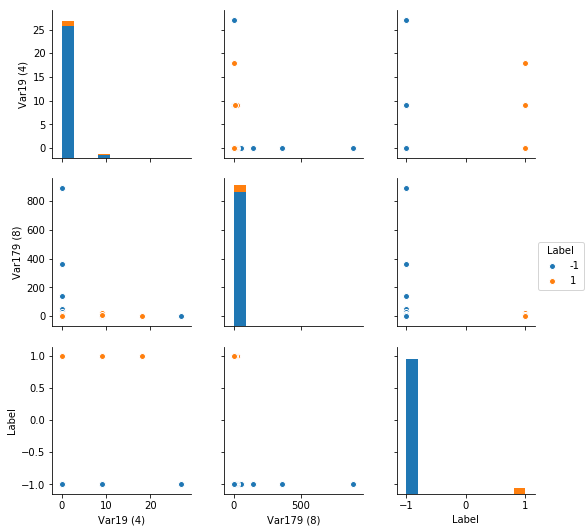

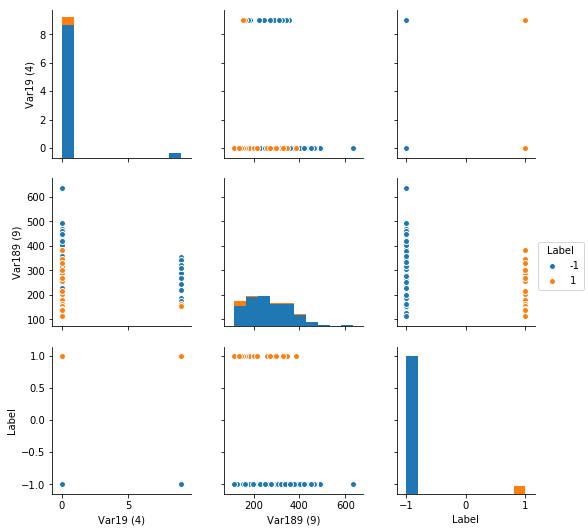

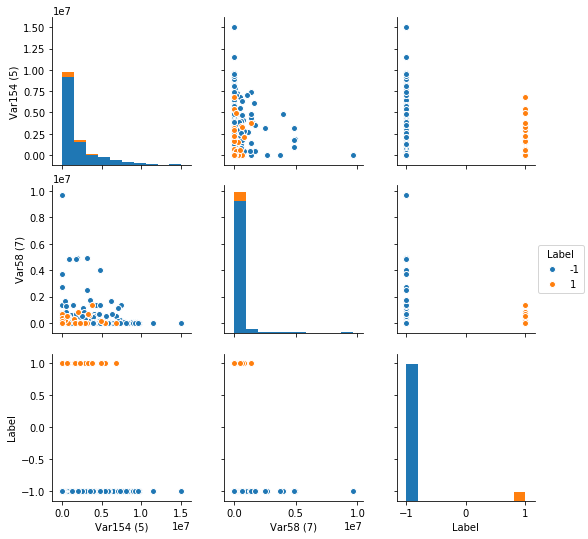

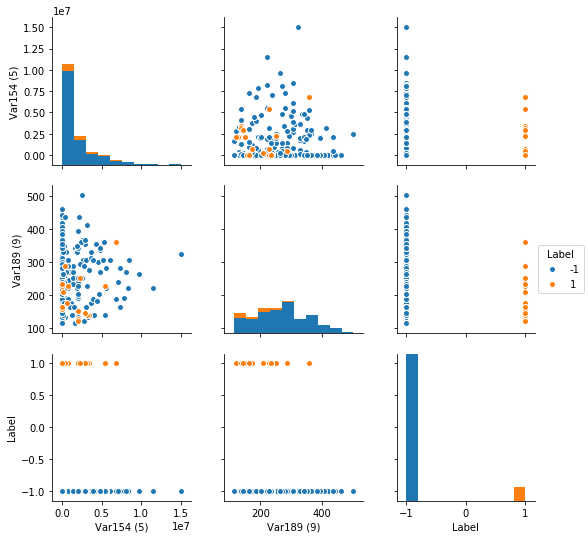

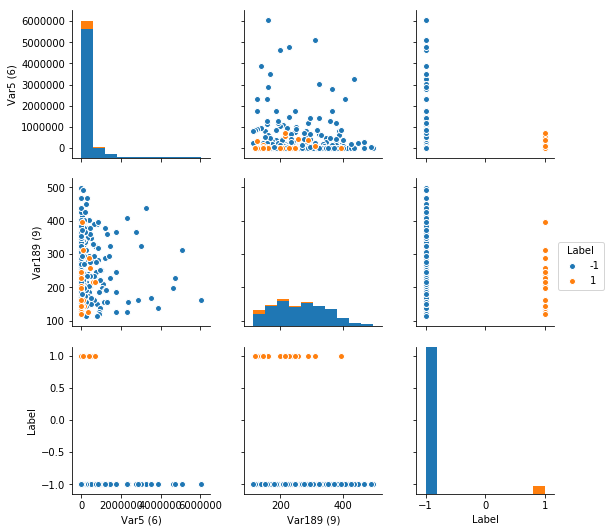

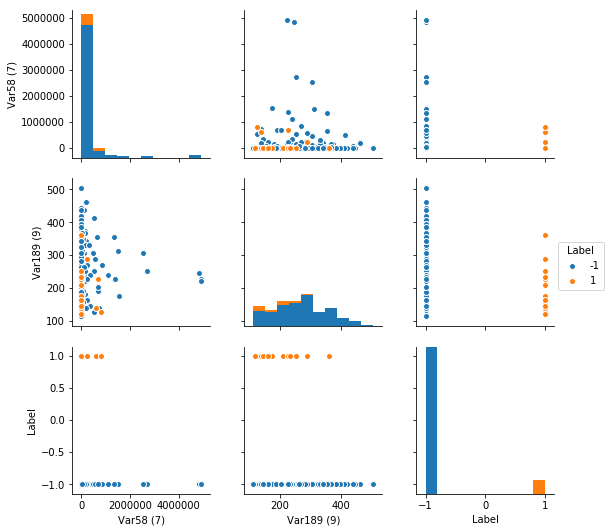

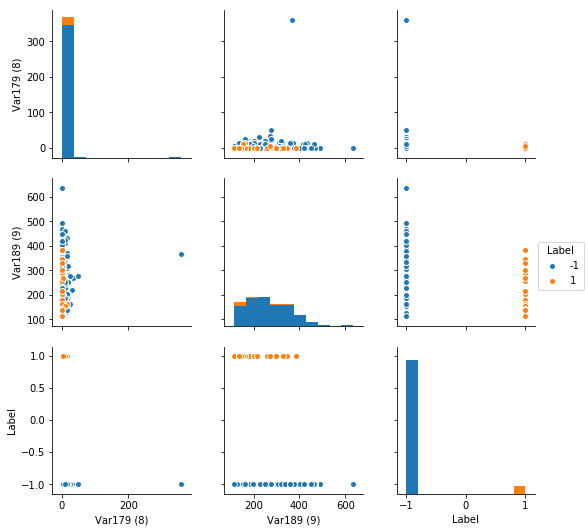

In [10]:
for i, c in enumerate(rnd10[:]):
    for j, c2 in enumerate(rnd10[:]):
        if (i < j):
            dpair = data[[c,c2,'Label']].dropna()
            dpair.columns = [c+' (%i)'%i, c2+' (%i)'%j,'Label']
            if dpair.shape[0]!=0:
                sns.pairplot(dpair, hue='Label', diag_kind = 'hist')

_На 10 случайных признаках (за вычетом топ20) видно значительно перемешивание оттока и неоттока. Гистаграммы схожи_

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

Наименее коррелированные признаки ['Var97' 'Var173' 'Var149' 'Var143' 'Var2' 'Var11' 'Var138' 'Var163'
 'Var6' 'Var118']


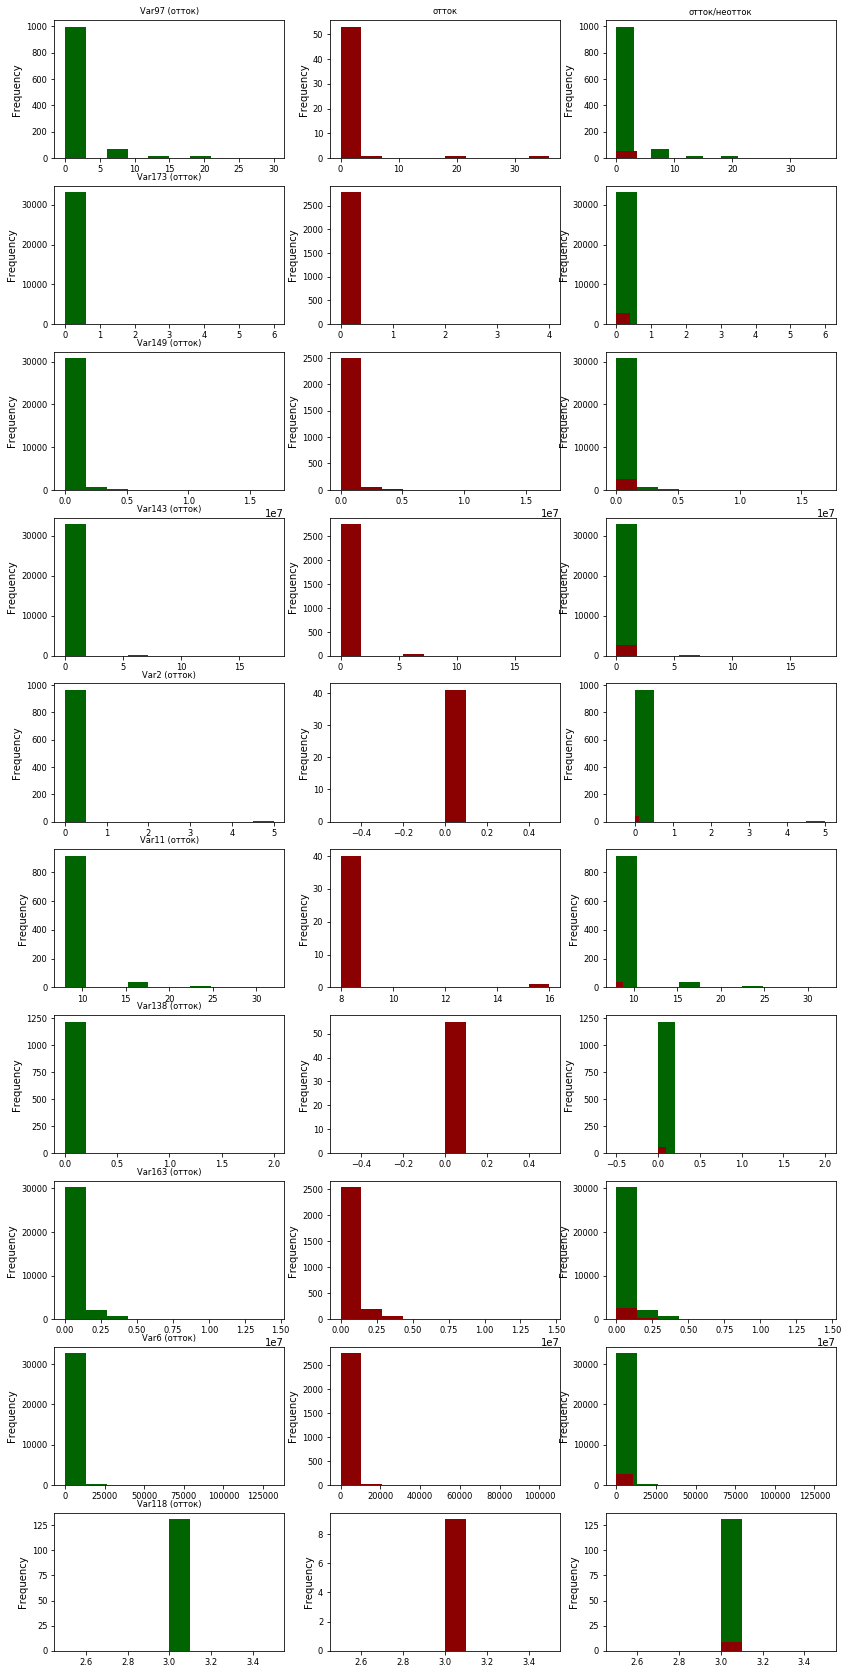

In [16]:
bot10 = np.array(delta_mean[-10:])[:,0]

print ('Наименее коррелированные признаки %s' % bot10)

fig, axs = plt.subplots(nrows = len(bot10), ncols = 3, figsize=(14,30))

axs[0,0].set_title('неотток', fontsize='small')
axs[0,1].set_title('отток', fontsize='small')
axs[0,2].set_title('отток/неотток', fontsize='small')
    
for i, c in enumerate(bot10):
    axs[i,0].set_title(c+' (отток)', fontsize='small')
    data[c][data.Label==-1].plot(kind='hist', color='darkgreen', ax=axs[i,0], fontsize='small')
    data[c][data.Label==1].plot(kind='hist', color='darkred', ax=axs[i,1], fontsize='small')
    data[c][data.Label==-1].plot(kind='hist', color='darkgreen', ax=axs[i,2], fontsize='small')
    data[c][data.Label==1].plot(kind='hist', color='darkred', ax=axs[i,2], fontsize='small')   

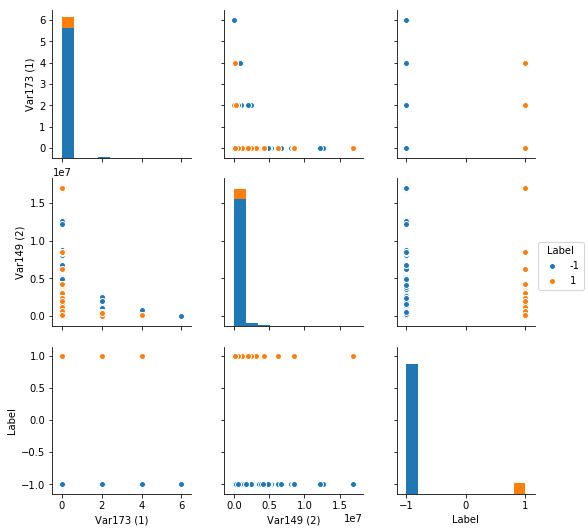

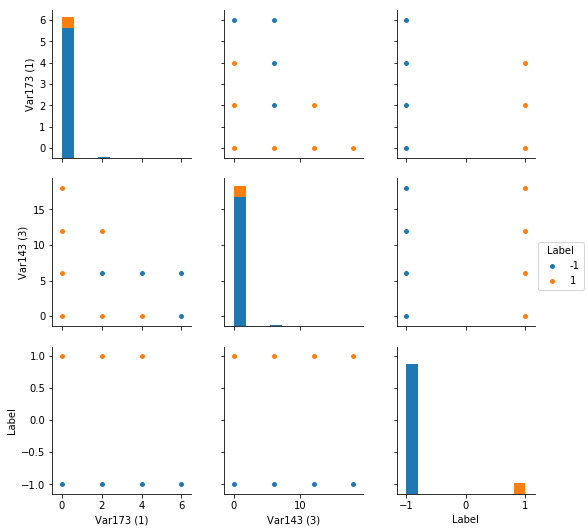

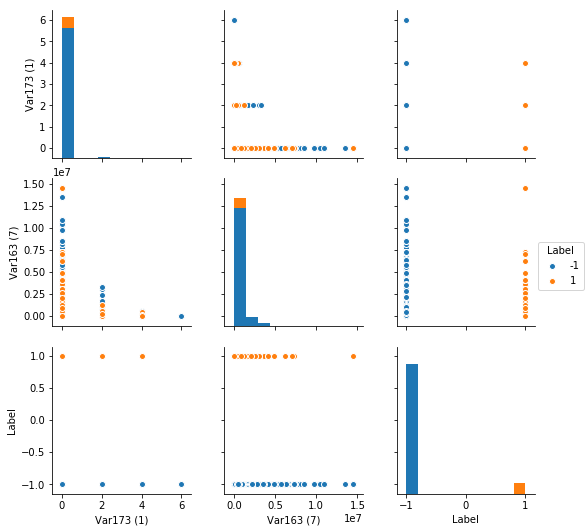

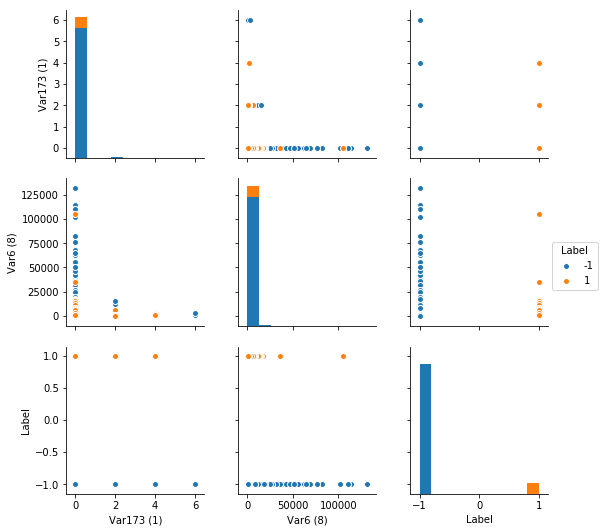

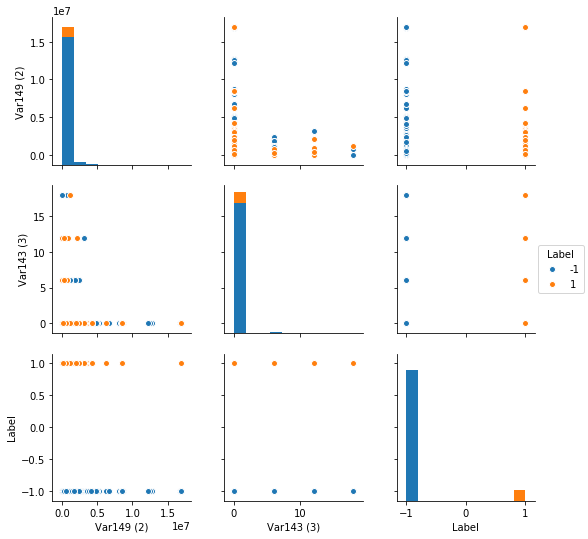

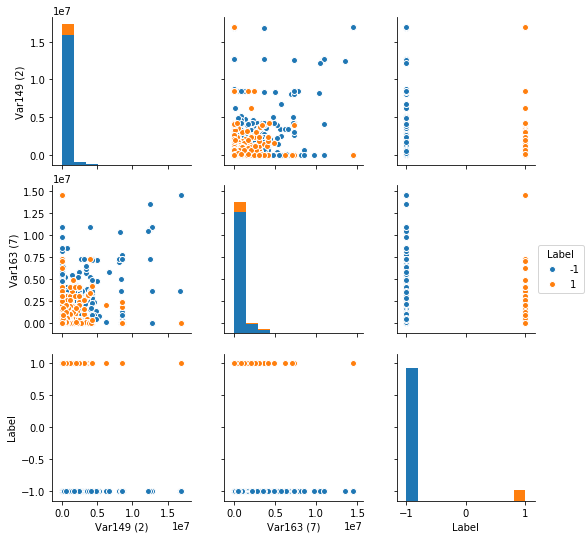

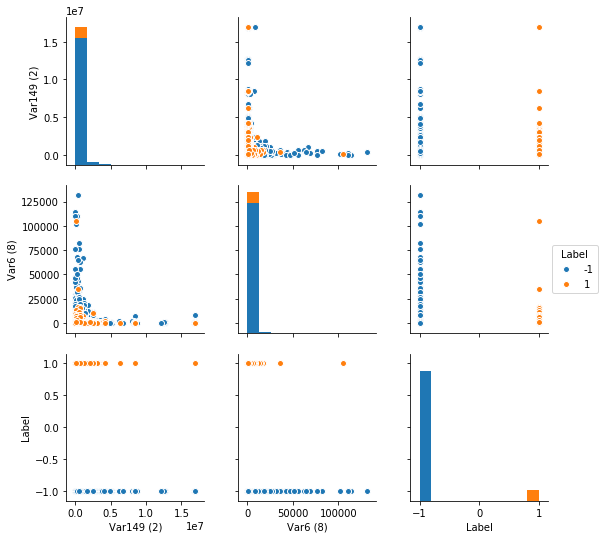

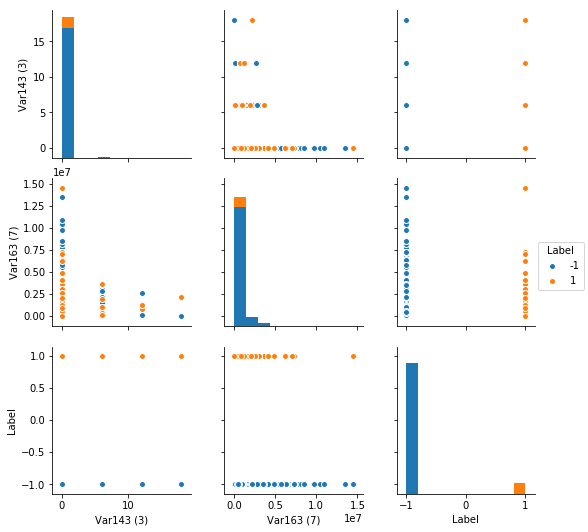

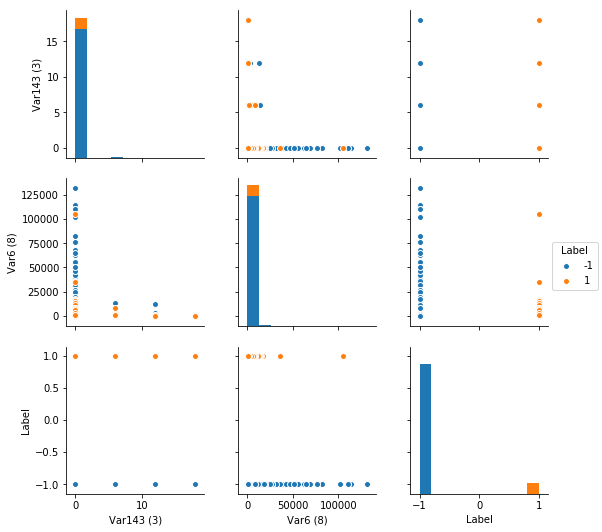

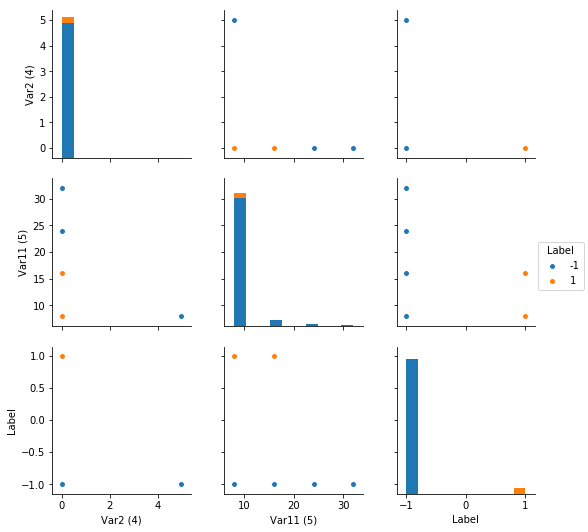

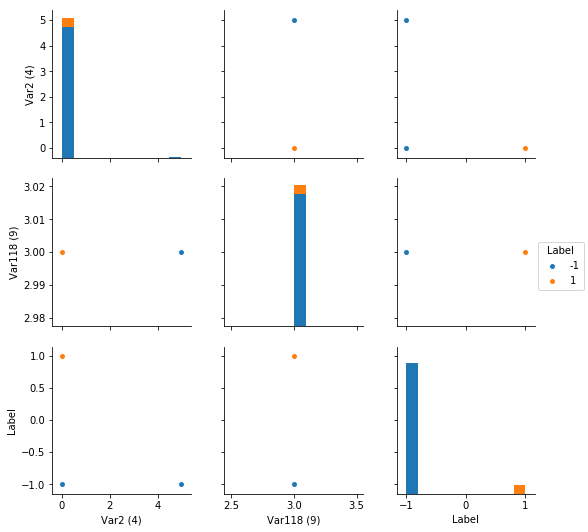

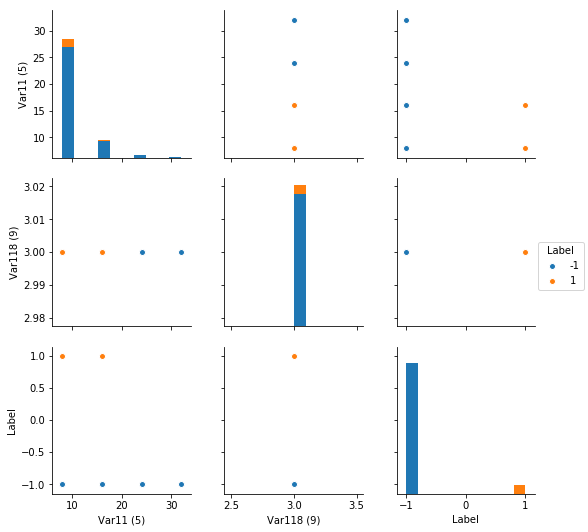

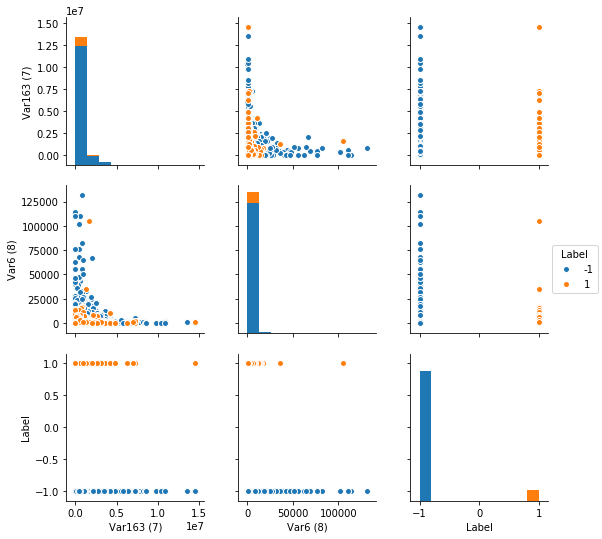

In [12]:
for i, c in enumerate(bot10[:]):
    for j, c2 in enumerate(bot10[:]):
        if (i < j):
            dpair = data[[c,c2,'Label']].dropna()
            dpair.columns = [c+' (%i)'%i, c2+' (%i)'%j,'Label']
            if dpair.shape[0]!=0:
                sns.pairplot(dpair, hue='Label', diag_kind = 'hist')

Раз речь идет о потенциальном наименьшем влиянии, то сразу посмотрим и на возможные константные признаки

In [37]:
nan_columns = list(set(data.columns)-set(data.dropna(axis=1, how='all').columns))
nan_columns.sort()
print ('Признаки без данных (всего %i): %s' % (len(nan_columns),nan_columns))

Признаки без данных (всего 18): ['Var141', 'Var15', 'Var167', 'Var169', 'Var175', 'Var185', 'Var20', 'Var209', 'Var230', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48', 'Var52', 'Var55', 'Var79', 'Var8']


In [55]:
const_columns = [x for x in data.columns if len(data[x].value_counts()) == 1]

print ('Признаки, имеющие только одно значение (всего %i): %s' %(len(const_columns),const_columns))

Признаки, имеющие только одно значение (всего 5): ['Var118', 'Var191', 'Var213', 'Var215', 'Var224']


_Гистаграммы оттока/неоттока очень похожи друг на друга. В подавляющем большинстве пар признаков данные очень сильно перемешаны, и их количество весьма небольшое, однако некоторые пары (Var6,Var53) на самом деле неплохо выделят отток._

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

C:\Users\Bebchik\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


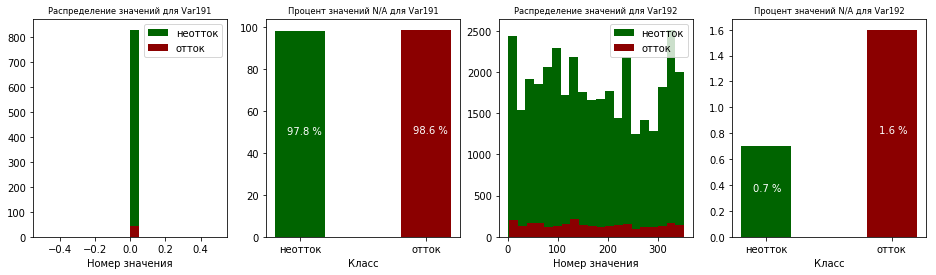

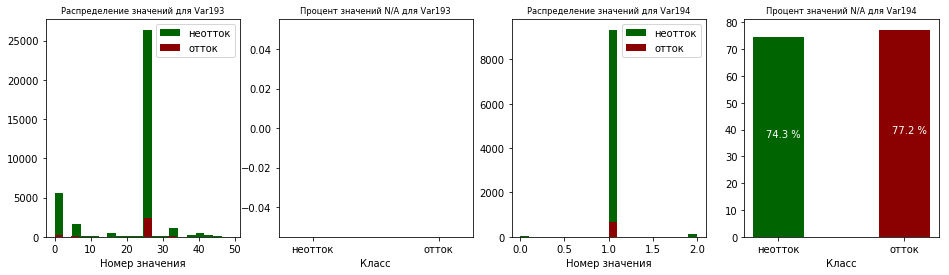

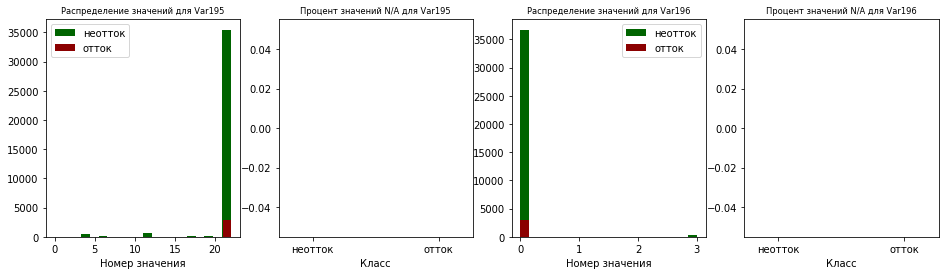

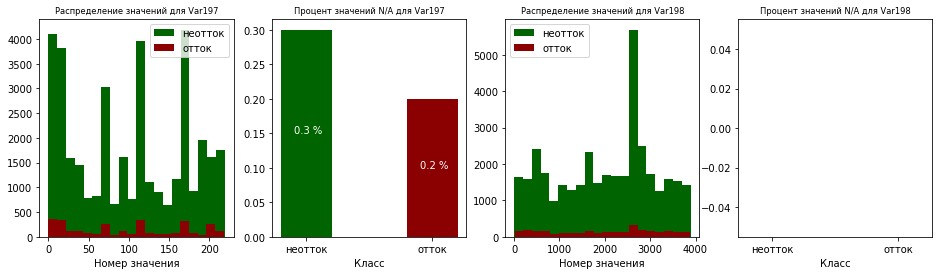

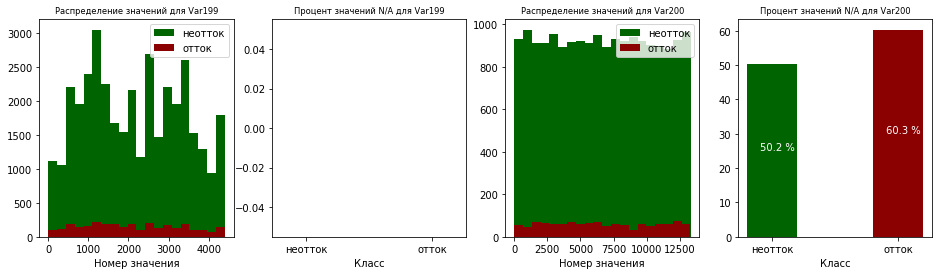

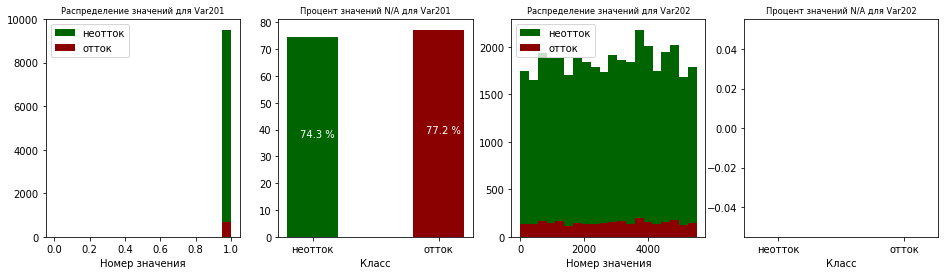

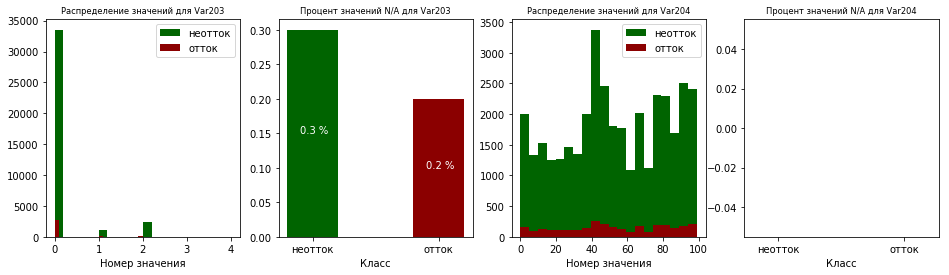

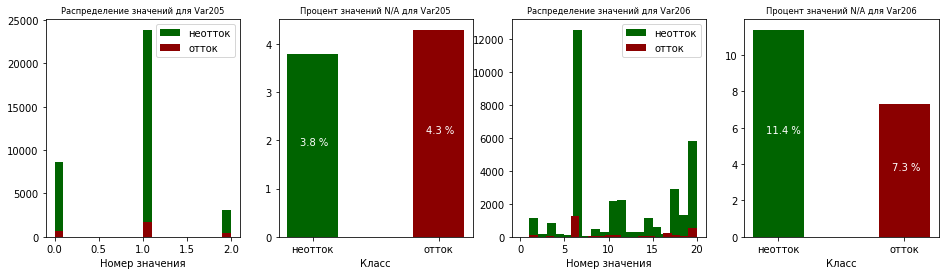

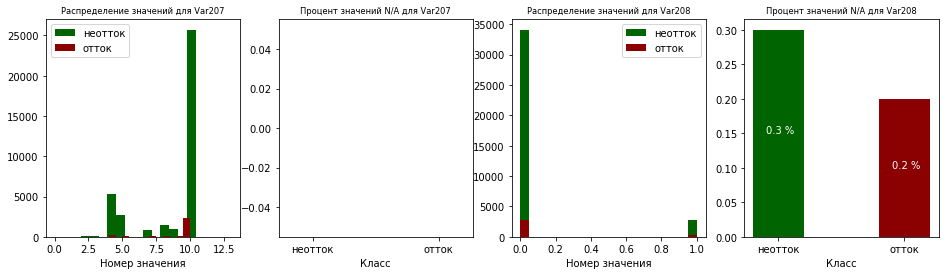

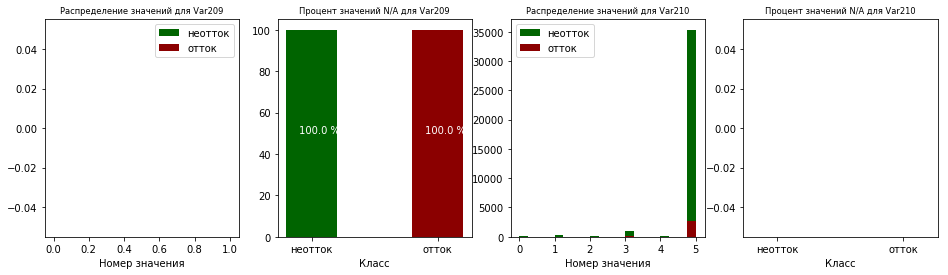

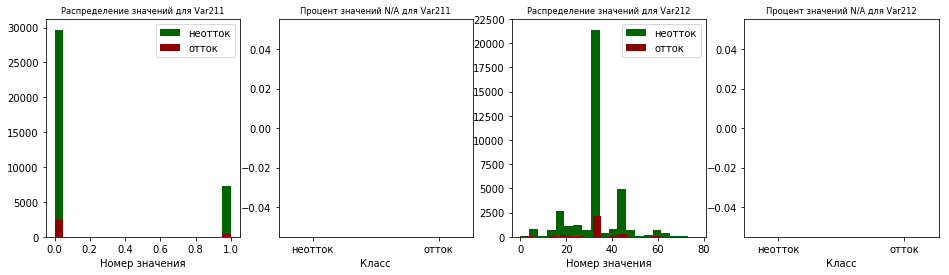

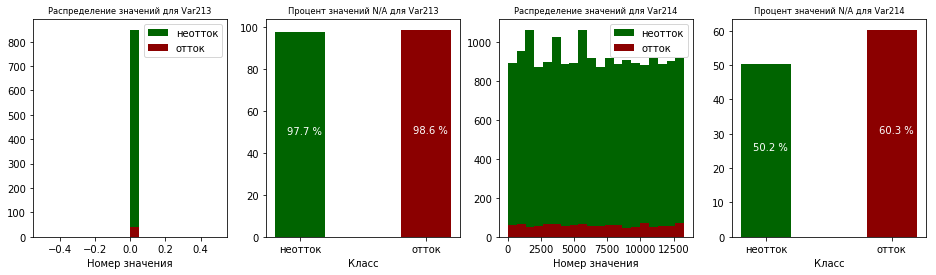

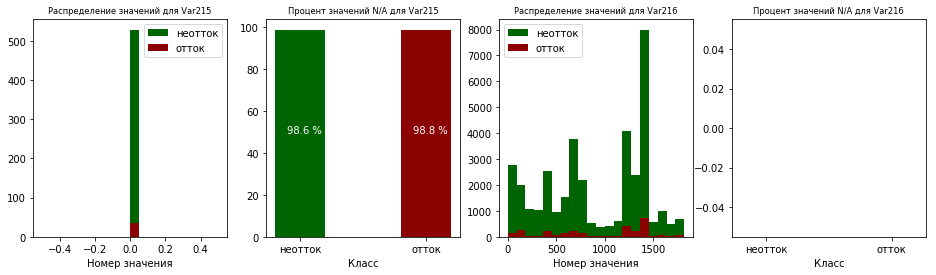

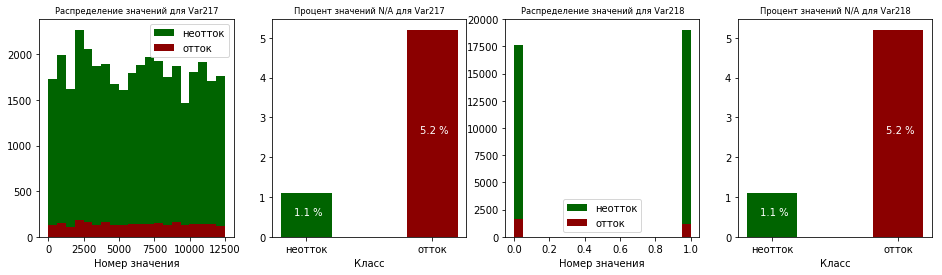

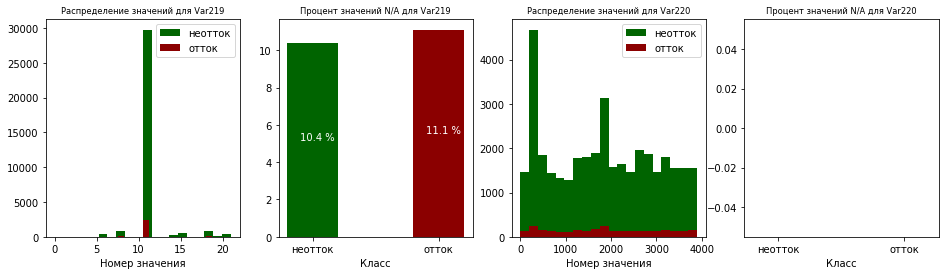

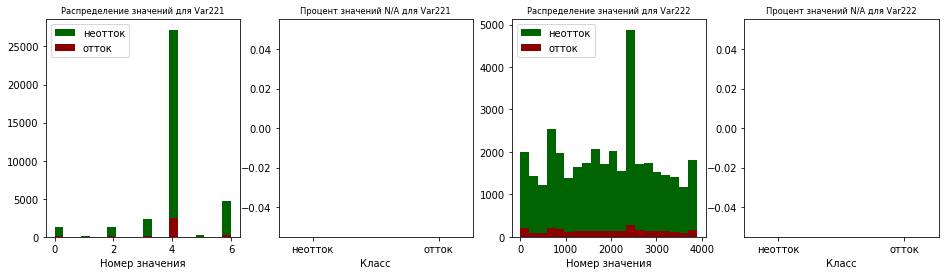

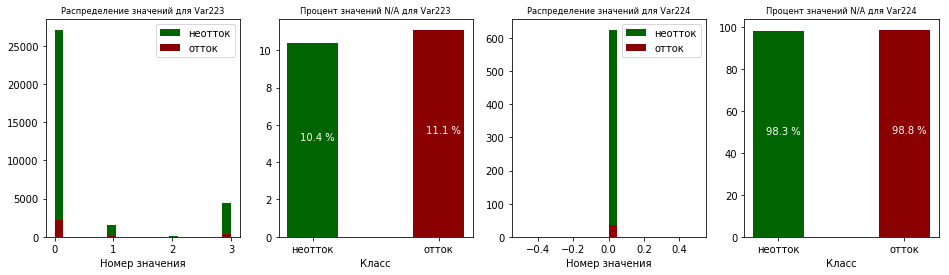

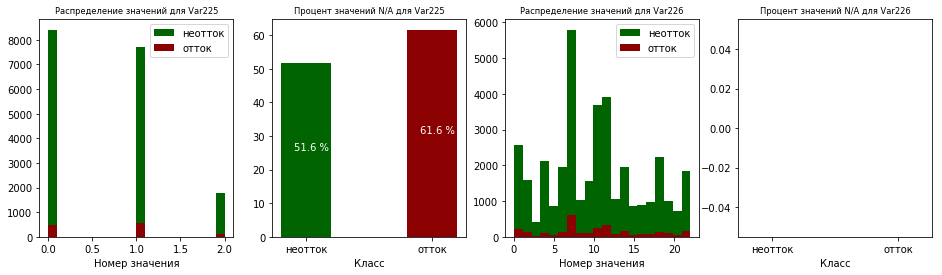

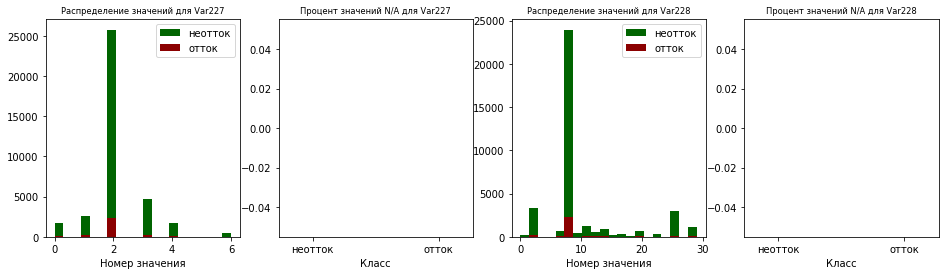

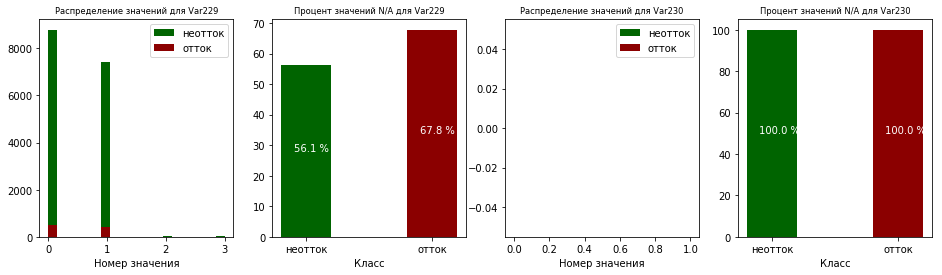

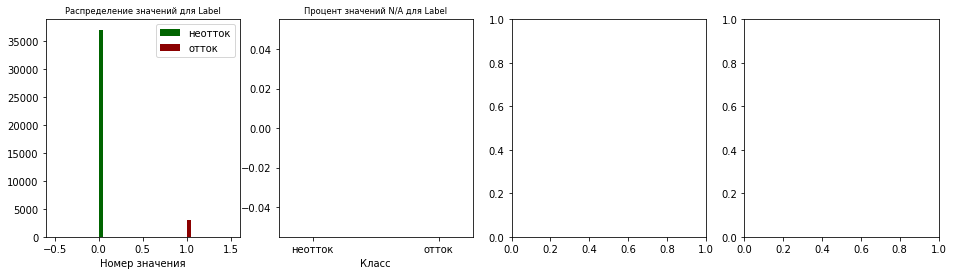

In [169]:
for i, c in enumerate(categorical_data_columns):
    data0 = data[c][data.Label == -1]
    data1 = data[c][data.Label ==  1]
    le = preprocessing.LabelEncoder()
#    le.fit(np.unique(data[c].fillna('N/A').sort_values().values))
    le.fit(np.unique(data[c].dropna().values))
    #для компактности будем располагать по 2 признака на одной строке
    axs_base = i%2
    if axs_base == 0:
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))   
    #сначала покажем распределение признаков по оттоку и неоттоку
    axs[axs_base*2+0].set_title('Распределение значений для %s' % c)
    axs[axs_base*2+0].hist(le.transform(data0.dropna()), color='darkgreen', bins=20)
    axs[axs_base*2+0].hist(le.transform(data1.dropna()), color='darkred', bins=20)
    axs[axs_base*2+0].set_xlabel('Номер значения')
    axs[axs_base*2+0].legend(['неотток','отток'])
    axs[axs_base*2+0].title.set_fontsize('small')
    #рядом покажем отношение пропусков к общему числу элементов класса (чтобы не засорять гистограммы заданных значений)
    axs[axs_base*2+1].set_title('Процент значений N/A для %s' % c)
    na0_prc = np.round(data0[data0.isna()].shape[0]/float(data0.shape[0])*100,1)
    na1_prc = np.round(data1[data1.isna()].shape[0]/float(data1.shape[0])*100,1)

    rect=axs[axs_base*2+1].bar(x=[-1,1], height=[na0_prc,na1_prc], color=['darkgreen','darkred'],tick_label=['неотток','отток'])
    
    axs[axs_base*2+1].text(-1.2,rect[0].get_height()/2,'%.1f %%' % na0_prc, color='white')
    axs[axs_base*2+1].text( 0.8,rect[1].get_height()/2,'%.1f %%' % na1_prc, color='white')
    
    axs[axs_base*2+1].set_xlabel('Класс')
    axs[axs_base*2+1].title.set_fontsize('small')
    

_Из сопоставления видов распределений категориальных признаков по разным значениям класса оттока можно сделать вывод, что в основном распределения очень похожи, и только для признаков Var214 и Var217 распределения оттока и неоттока существенно различаются. Можно предположить, что эти признаки внесут существенный вклад при классификации оттока._

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

__Выводы__

- Из закономерностей на многих признаках можно увидеть экспоненциальную зависимость, что можно в дальнейшем использовать логарифмируя такие признаки.  
- Также на графиках пар признаков видно, что отток, как правило, сосредоточен в узких областях, а неотток покрывает эти области. Раз отток локализуется, то это может помочь его выявить, но отсутствия явного разделения оттока и неоттока может снизить качество классификации.
- Категориальные признаки оценить визуально сложно, распределения похожи для оттока и неоттока, за исключением пары признаков.
- Исходя из разницы математических ожиданий, и визуализации пар признаков можно предположить, что максимальное влияние окажут признаки  Var41, Var64, Var87, Var101, Var115, Var129, Var168, Var214, Var217.
- Можно предположить, что наименьшее влияние окажут признаки Var11, Var138, Var163, Var6, Var118. В то же время говорить о наименьшем влиянии немного странно, поскольку можно предположить, что среди 231 признака будет как минимум несколько десятков, влияние которых скорее всего будет близко к нулю.   
  Ну и, естественно, константные признаки (таких 5) и признаки без данных (таких 18) тоже влиять никак не будут, т.к. мы их уберем.